In [ ]:
pip install matplotlib seaborn pandas

In [ ]:
pip install imbalanced-learn

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
from imblearn.over_sampling import SMOTE
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
path ="/content/drive/MyDrive/botnet_dataset/Provision_PT_737E_Security_Camera.csv"
df=pd.read_csv(path)
df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
1          1.000000      590.000000            0.000000          1.000000   
2          1.942585      590.000000            0.000000          1.965145   
3          1.000000       60.000000            0.000000          1.000000   
4          1.979600       66.061831           35.996177          1.987709   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0         60.0000        0.000000e+00          1.000000       60.000000   
1        590.0000        0.000000e+00          1.000000      590.000000   
2        590.0000        1.160000e-10          1.988244      590.000000   
3         60.0000        0.000000e+00          1.000000       60.000000   
4         66.0371        3.599862e+01          1.995886       66.012367   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0            0.000000     1.000000  ...        1.000000          60.0   
1            0.000000     1.000000  ...        1.000000         590.0   
2            0.000000     1.942585  ...        1.965145         590.0   
3            0.000000     1.000000  ...        1.000000          60.0   
4           35.999847     1.979600  ...        1.000000          72.0   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0     0.000000                 0.0          0.0        1.000000     60.000000   
1     0.000026                 0.0          0.0        1.000023    589.994396   
2     0.000019                 0.0          0.0        1.988266    589.997214   
3     0.000000                 0.0          0.0        1.000000     60.000000   
4     0.000000                 0.0          0.0        1.000000     72.000000   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0     0.000000                 0.0          0.0  
1     1.178915                 0.0          0.0  
2     0.831160                 0.0          0.0  
3     0.000000                 0.0          0.0  
4     0.000000                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
print(df.columns)

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'H_L5_weight', 'H_L5_mean', 'H_L5_variance', 'H_L3_weight', 'H_L3_mean',
       'H_L3_variance', 'H_L1_weight', 'H_L1_mean', 'H_L1_variance',
       'HH_L5_weight', 'HH_L5_mean', 'HH_L5_std', 'HH_L5_covariance',
       'HH_L5_pcc', 'HH_L3_weight', 'HH_L3_mean', 'HH_L3_std',
       'HH_L3_covariance', 'HH_L3_pcc', 'HH_L1_weight', 'HH_L1_mean',
       'HH_L1_std', 'HH_L1_covariance', 'HH_L1_pcc', 'HH_jit_L5_weight',
       'HH_jit_L5_mean', 'HH_jit_L5_variance', 'HH_jit_L3_weight',
       'HH_jit_L3_mean', 'HH_jit_L3_variance', 'HH_jit_L1_weight',
       'HH_jit_L1_mean', 'HH_jit_L1_variance', 'HpHp_L5_weight',
       'HpHp_L5_mean', 'HpHp_L5_std', 'HpHp_L5_covariance', 'HpHp_L5_pcc',
       'HpHp_L3_weight', 'HpHp_L3_mean', 'HpHp_L3_std', 'HpHp_L3_covariance',
       'HpHp_L3_pcc', 

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
MI_dir_L5_weight      0
MI_dir_L5_mean        0
MI_dir_L5_variance    0
MI_dir_L3_weight      0
MI_dir_L3_mean        0
MI_dir_L3_variance    0
MI_dir_L1_weight      0
MI_dir_L1_mean        0
MI_dir_L1_variance    0
H_L5_weight           0
H_L5_mean             0
H_L5_variance         0
H_L3_weight           0
H_L3_mean             0
H_L3_variance         0
H_L1_weight           0
H_L1_mean             0
H_L1_variance         0
HH_L5_weight          0
HH_L5_mean            0
HH_L5_std             0
HH_L5_covariance      0
HH_L5_pcc             0
HH_L3_weight          0
HH_L3_mean            0
HH_L3_std             0
HH_L3_covariance      0
HH_L3_pcc             0
HH_L1_weight          0
HH_L1_mean            0
HH_L1_std             0
HH_L1_covariance      0
HH_L1_pcc             0
HH_jit_L5_weight      0
HH_jit_L5_mean        0
HH_jit_L5_variance    0
HH_jit_L3_weight      0
HH_jit_L3_mean        0
HH_jit_L3_variance    0
HH_jit_L1_weight      0
HH_jit_L1_mean        0

Null values in DataFrame:
       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0                 False           False               False             False   
1                 False           False               False             False   
2                 False           False               False             False   
3                 False           False               False             False   
4                 False           False               False             False   
...                 ...             ...                 ...               ...   
62149             False           False               False             False   
62150             False           False               False             False   
62151             False           False               False             False   
62152             False           False               False             False   
62153             False           False               False             False   

 

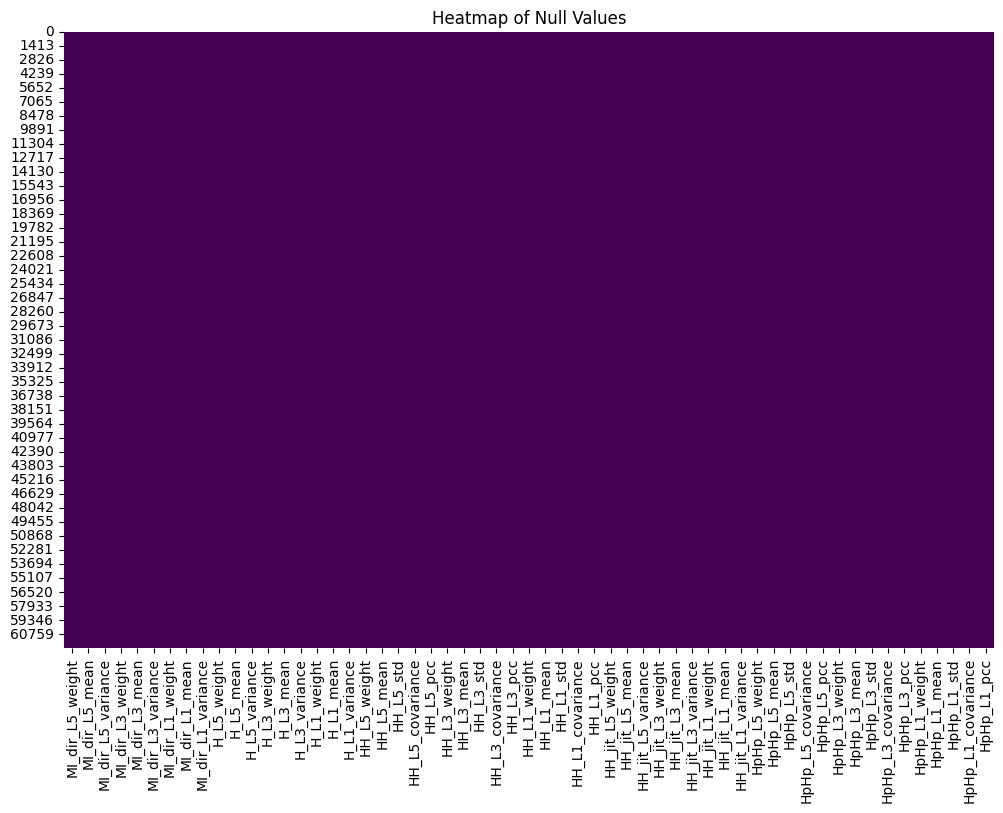

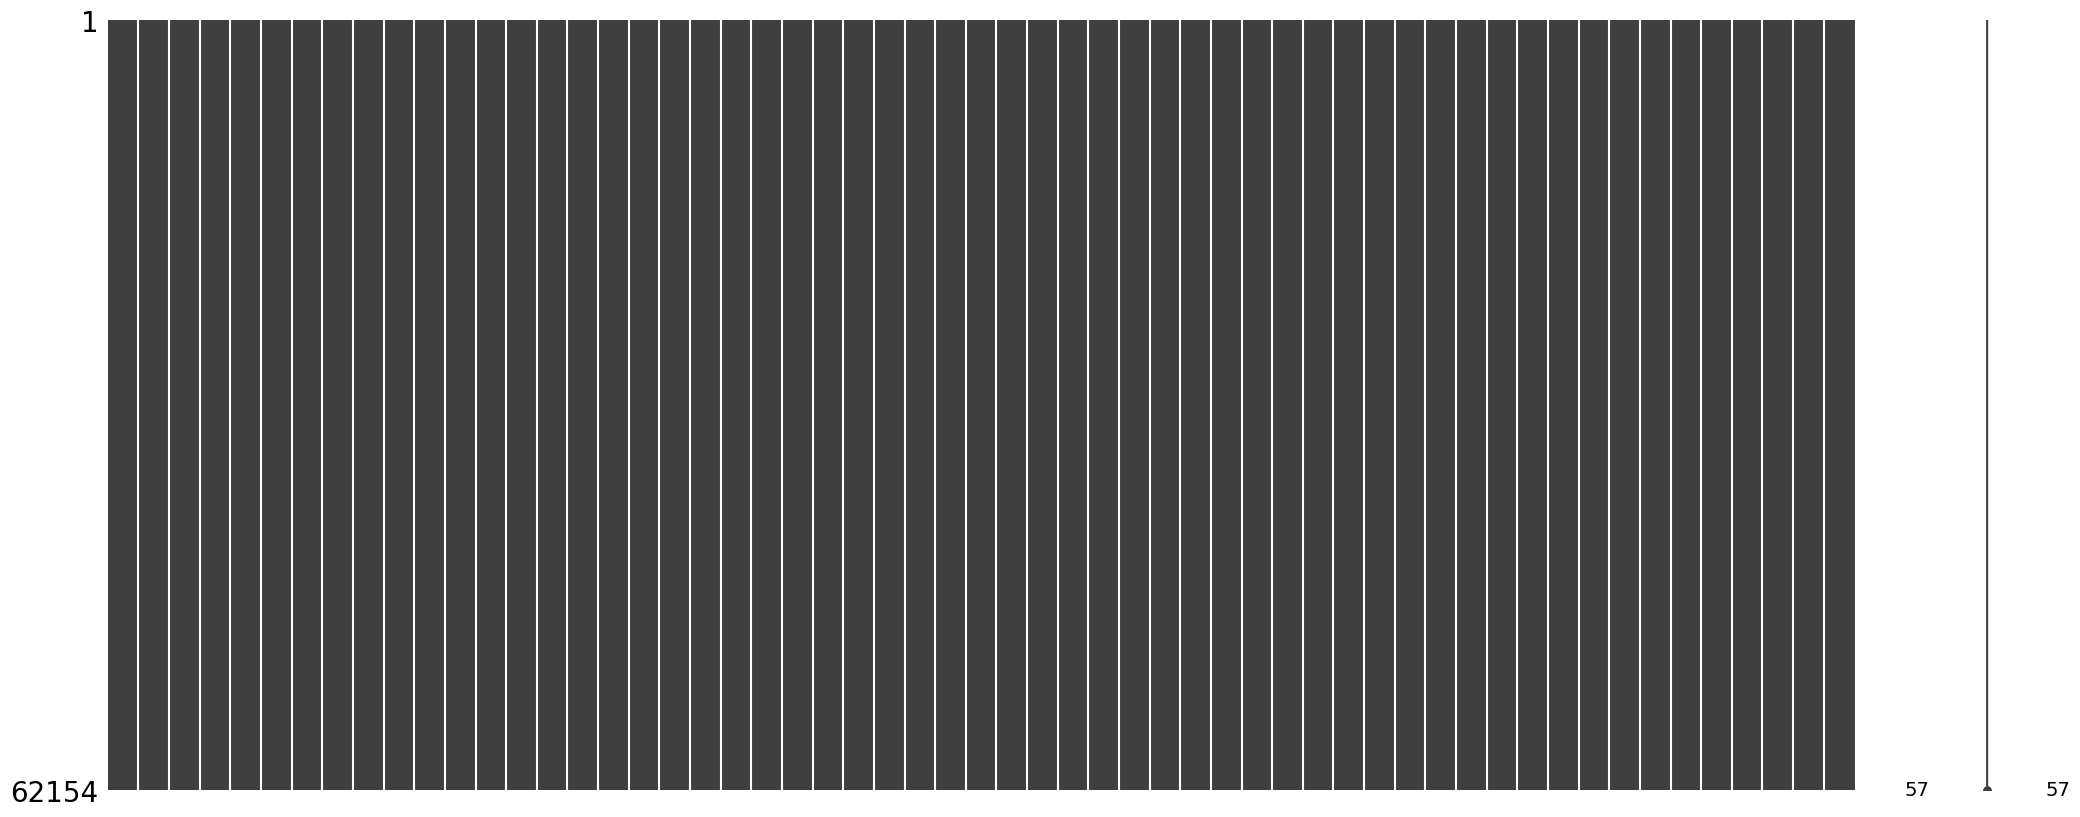

In [ ]:
# Check for null values
print("Null values in DataFrame:")
print(df.isnull())

# Count null values per column
print("\nCount of null values per column:")
print(df.isnull().sum())

# Display rows with null values
print("\nRows with null values:")
print(df[df.isnull().any(axis=1)])

# Visualize null values with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Null Values')
plt.show()

# Visualize missing values matrix
msno.matrix(df)
plt.show()

In [ ]:
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
MI_dir_L5_weight      float64
MI_dir_L5_mean        float64
MI_dir_L5_variance    float64
MI_dir_L3_weight      float64
MI_dir_L3_mean        float64
MI_dir_L3_variance    float64
MI_dir_L1_weight      float64
MI_dir_L1_mean        float64
MI_dir_L1_variance    float64
H_L5_weight           float64
H_L5_mean             float64
H_L5_variance         float64
H_L3_weight           float64
H_L3_mean             float64
H_L3_variance         float64
H_L1_weight           float64
H_L1_mean             float64
H_L1_variance         float64
HH_L5_weight          float64
HH_L5_mean            float64
HH_L5_std             float64
HH_L5_covariance      float64
HH_L5_pcc             float64
HH_L3_weight          float64
HH_L3_mean            float64
HH_L3_std             float64
HH_L3_covariance      float64
HH_L3_pcc             float64
HH_L1_weight          float64
HH_L1_mean            float64
HH_L1_std             float64
HH_L1_covariance      float64
HH_L1_pcc    

In [ ]:
max_values = df.max()
min_values = df.min()

print("Maximum values for each feature:")
print(max_values)

print("\nMinimum values for each feature:")
print(min_values)

Maximum values for each feature:
MI_dir_L5_weight      5.554075e+01
MI_dir_L5_mean        5.900000e+02
MI_dir_L5_variance    4.105769e+05
MI_dir_L3_weight      6.824243e+01
MI_dir_L3_mean        5.900000e+02
MI_dir_L3_variance    3.021020e+05
MI_dir_L1_weight      8.768708e+01
MI_dir_L1_mean        5.900000e+02
MI_dir_L1_variance    1.352992e+05
H_L5_weight           5.554075e+01
H_L5_mean             5.900000e+02
H_L5_variance         4.105769e+05
H_L3_weight           6.824243e+01
H_L3_mean             5.900000e+02
H_L3_variance         3.021020e+05
H_L1_weight           8.768708e+01
H_L1_mean             5.899999e+02
H_L1_variance         1.352992e+05
HH_L5_weight          5.553290e+01
HH_L5_mean            1.469997e+03
HH_L5_std             2.941066e+02
HH_L5_covariance      3.087164e+04
HH_L5_pcc             9.505936e-01
HH_L3_weight          6.818122e+01
HH_L3_mean            1.469413e+03
HH_L3_std             2.841079e+02
HH_L3_covariance      3.145636e+04
HH_L3_pcc             

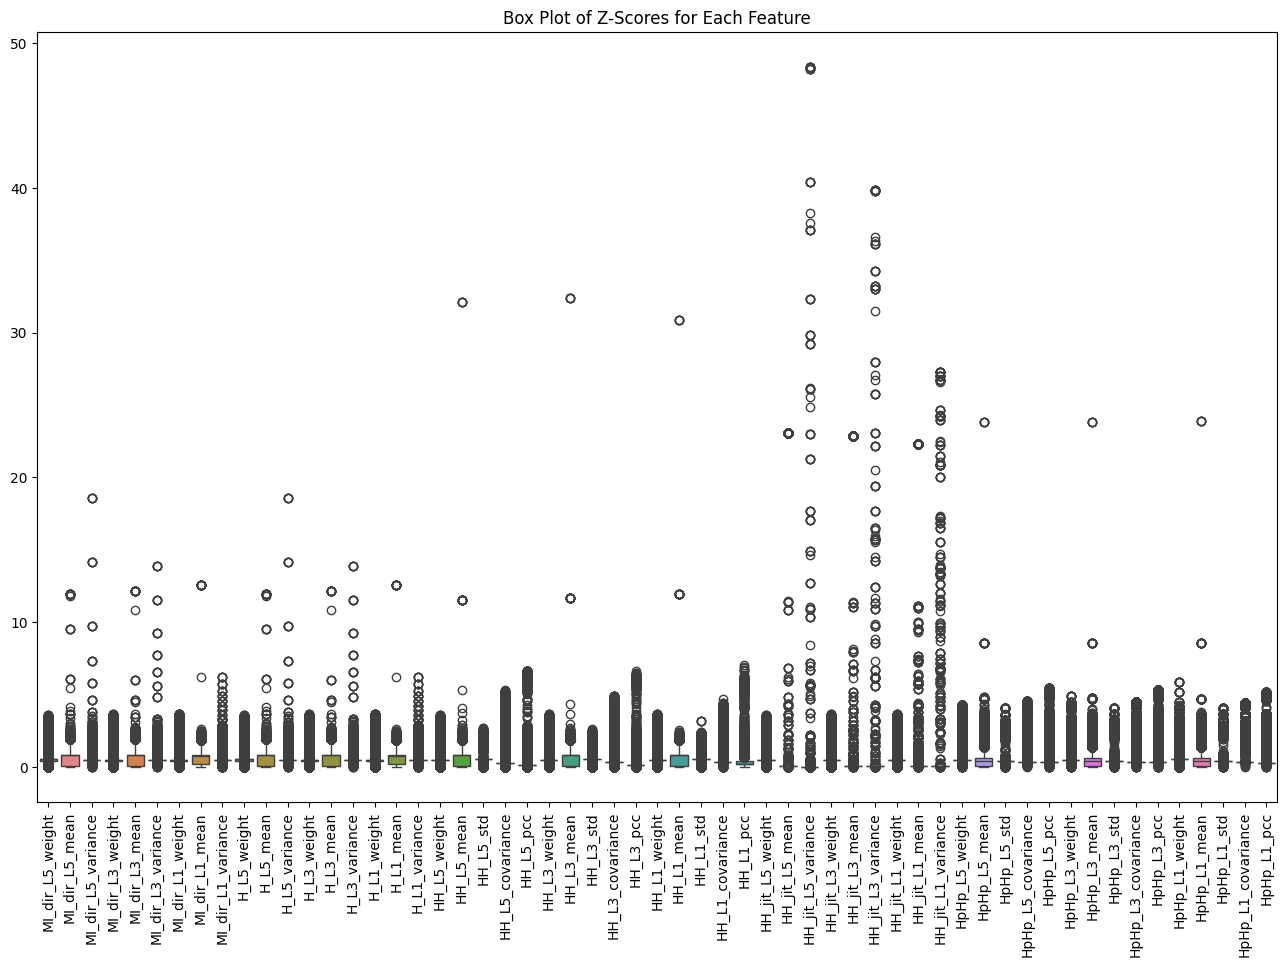

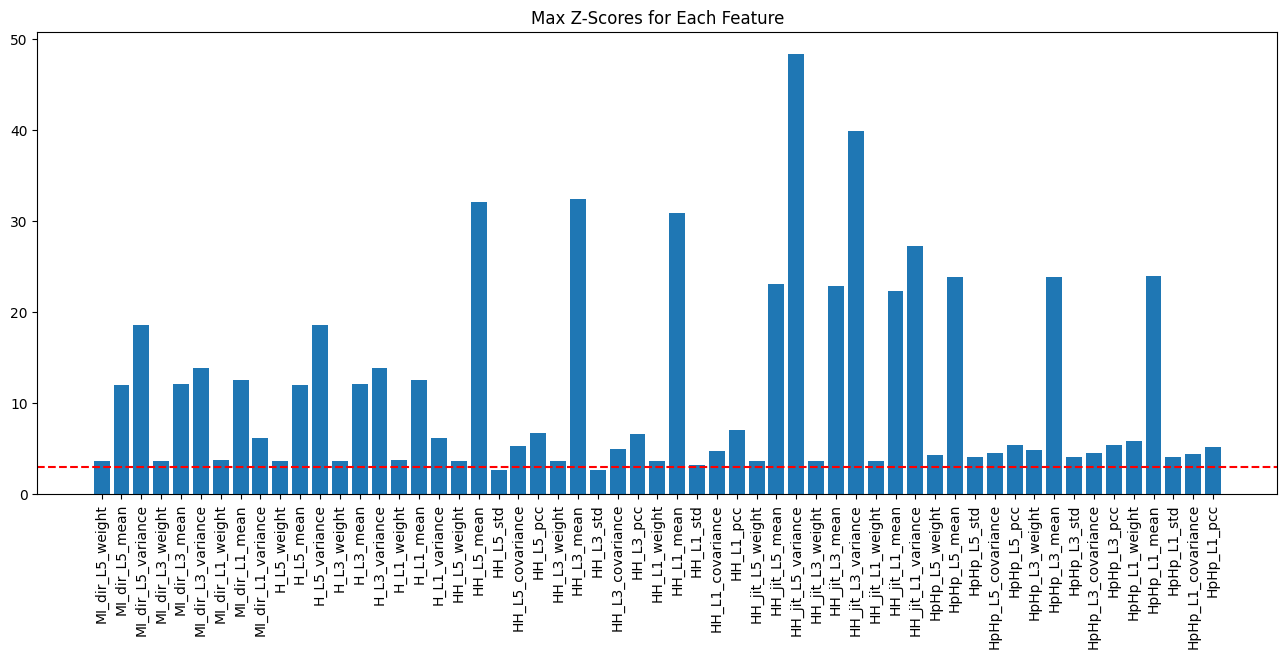

In [ ]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)
z_scores_df.head()
# Create a box plot for all features
plt.figure(figsize=(16, 10))  # Adjust the size depending on the number of features
sns.boxplot(data=z_scores_df)
plt.xticks(rotation=90)  # Rotate feature names if necessary
plt.title('Box Plot of Z-Scores for Each Feature')
plt.show()
# Calculate max Z-score for each feature
max_z_scores = z_scores_df.max()

# Plot the max Z-scores for each feature
plt.figure(figsize=(16, 6))
plt.bar(max_z_scores.index, max_z_scores.values)
plt.axhline(y=3, color='r', linestyle='--')  # Outlier threshold
plt.xticks(rotation=90)
plt.title('Max Z-Scores for Each Feature')
plt.show()

In [ ]:
threshold = 3

# Identify outliers for each feature
outliers = (z_scores_df > threshold)

# Display the rows and features that are outliers
outliers_summary = df[outliers.any(axis=1)]
print(f"Number of rows with outliers: {outliers_summary.shape[0]}")

# Display the first few rows with outliers
outliers_summary.head()

Number of rows with outliers: 9489


MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
1          1.000000      590.000000            0.000000          1.000000   
2          1.942585      590.000000            0.000000          1.965145   
3          1.000000       60.000000            0.000000          1.000000   
4          1.979600       66.061831           35.996177          1.987709   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0         60.0000        0.000000e+00          1.000000       60.000000   
1        590.0000        0.000000e+00          1.000000      590.000000   
2        590.0000        1.160000e-10          1.988244      590.000000   
3         60.0000        0.000000e+00          1.000000       60.000000   
4         66.0371        3.599862e+01          1.995886       66.012367   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0            0.000000     1.000000  ...        1.000000          60.0   
1            0.000000     1.000000  ...        1.000000         590.0   
2            0.000000     1.942585  ...        1.965145         590.0   
3            0.000000     1.000000  ...        1.000000          60.0   
4           35.999847     1.979600  ...        1.000000          72.0   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0     0.000000                 0.0          0.0        1.000000     60.000000   
1     0.000026                 0.0          0.0        1.000023    589.994396   
2     0.000019                 0.0          0.0        1.988266    589.997214   
3     0.000000                 0.0          0.0        1.000000     60.000000   
4     0.000000                 0.0          0.0        1.000000     72.000000   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0     0.000000                 0.0          0.0  
1     1.178915                 0.0          0.0  
2     0.831160                 0.0          0.0  
3     0.000000                 0.0          0.0  
4     0.000000                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
# Count of outliers per feature
outlier_counts_per_feature = outliers.sum()

# Print the number of outliers per feature
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

Number of outliers per feature:
MI_dir_L5_weight      1183
MI_dir_L5_mean          30
MI_dir_L5_variance      36
MI_dir_L3_weight      1444
MI_dir_L3_mean          28
MI_dir_L3_variance      37
MI_dir_L1_weight      1755
MI_dir_L1_mean          13
MI_dir_L1_variance      40
H_L5_weight           1183
H_L5_mean               30
H_L5_variance           36
H_L3_weight           1444
H_L3_mean               28
H_L3_variance           37
H_L1_weight           1755
H_L1_mean               13
H_L1_variance           40
HH_L5_weight          1159
HH_L5_mean              21
HH_L5_std                0
HH_L5_covariance      2867
HH_L5_pcc             1024
HH_L3_weight          1430
HH_L3_mean              20
HH_L3_std                0
HH_L3_covariance      2697
HH_L3_pcc             1041
HH_L1_weight          1784
HH_L1_mean              17
HH_L1_std                4
HH_L1_covariance      1604
HH_L1_pcc             1075
HH_jit_L5_weight      1159
HH_jit_L5_mean         155
HH_jit_L5_variance     

Number of outliers per feature:
MI_dir_L5_weight      1183
MI_dir_L5_mean          30
MI_dir_L5_variance      36
MI_dir_L3_weight      1444
MI_dir_L3_mean          28
MI_dir_L3_variance      37
MI_dir_L1_weight      1755
MI_dir_L1_mean          13
MI_dir_L1_variance      40
H_L5_weight           1183
H_L5_mean               30
H_L5_variance           36
H_L3_weight           1444
H_L3_mean               28
H_L3_variance           37
H_L1_weight           1755
H_L1_mean               13
H_L1_variance           40
HH_L5_weight          1159
HH_L5_mean              21
HH_L5_std                0
HH_L5_covariance      2867
HH_L5_pcc             1024
HH_L3_weight          1430
HH_L3_mean              20
HH_L3_std                0
HH_L3_covariance      2697
HH_L3_pcc             1041
HH_L1_weight          1784
HH_L1_mean              17
HH_L1_std                4
HH_L1_covariance      1604
HH_L1_pcc             1075
HH_jit_L5_weight      1159
HH_jit_L5_mean         155
HH_jit_L5_variance     

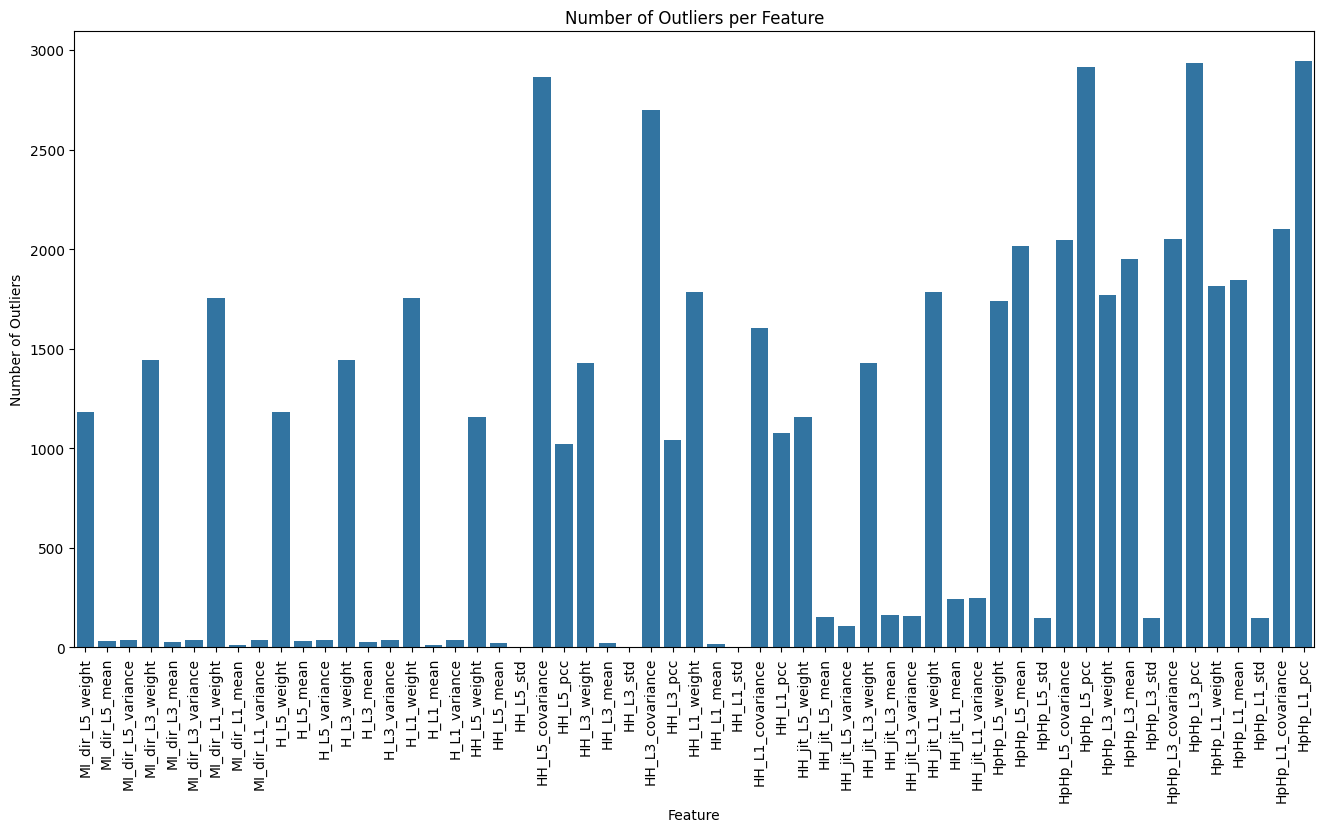

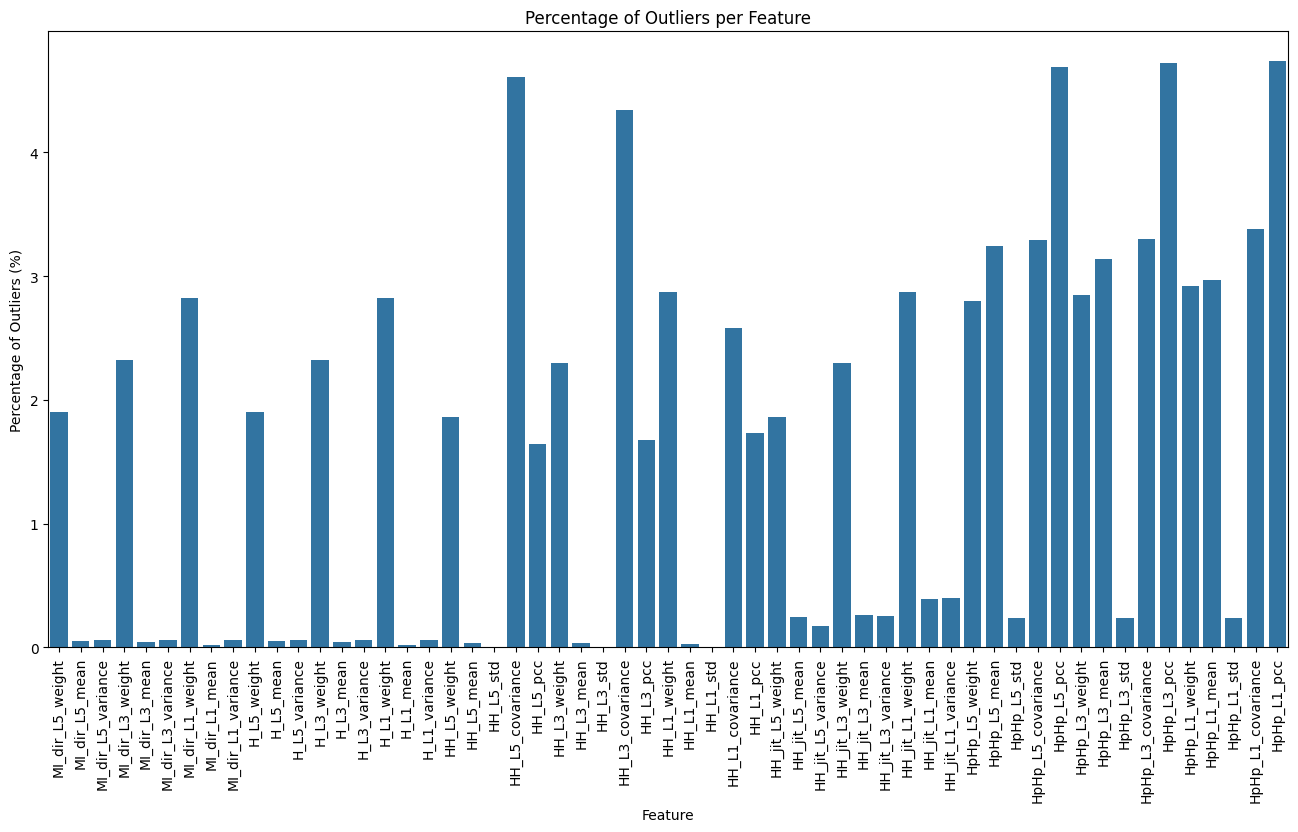

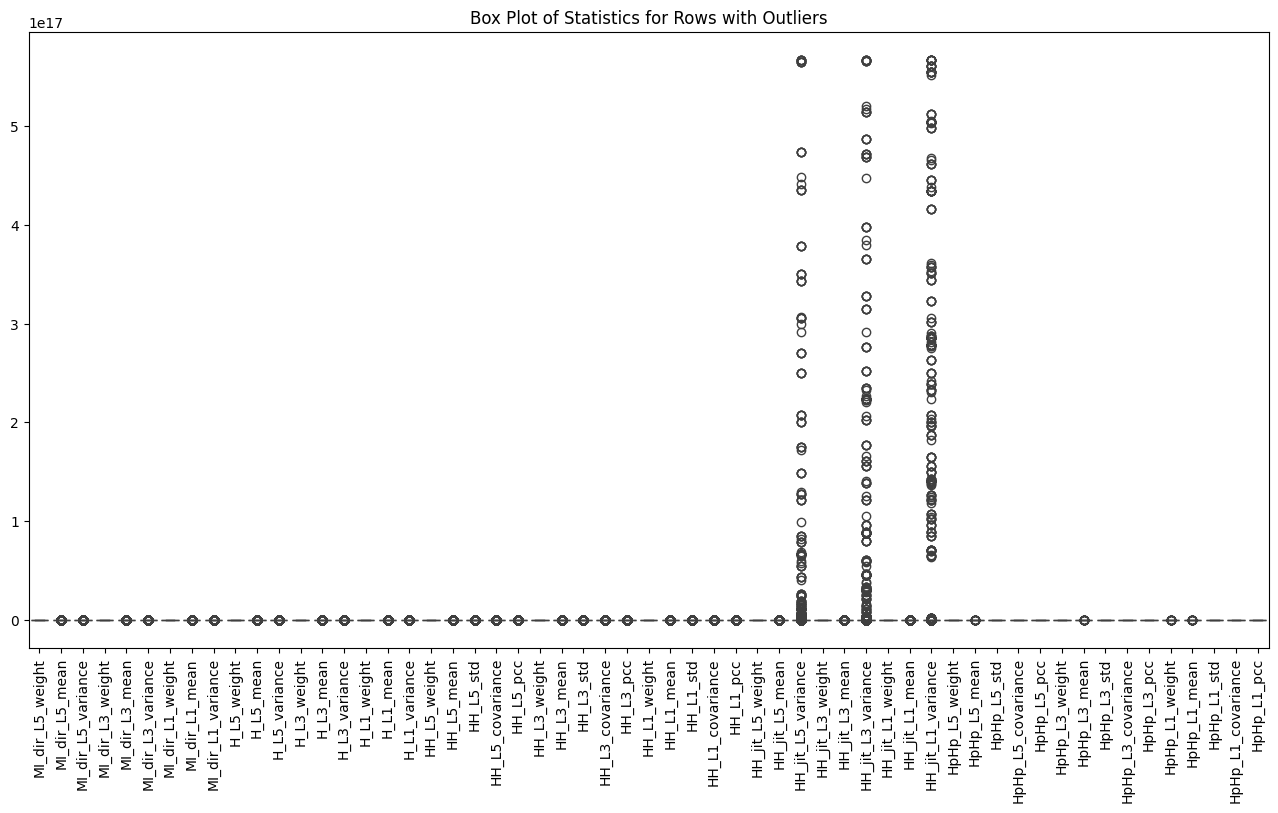

In [ ]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)

# Define threshold
threshold = 3

# Identify outliers
outliers = (z_scores_df > threshold)

# Summary of outliers
outliers_summary = df[outliers.any(axis=1)]

# Aggregate statistics for outliers
outlier_counts_per_feature = outliers.sum()
outlier_percentage_per_feature = (outlier_counts_per_feature / df.shape[0]) * 100
outliers_summary_stats = outliers_summary.describe()

# Print outlier counts and percentages
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

print("\nPercentage of outliers per feature:")
print(outlier_percentage_per_feature)

print("\nAggregated statistics for rows with outliers:")
print(outliers_summary_stats)

# Visualize number of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_counts_per_feature.index, y=outlier_counts_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers per Feature')
plt.show()

# Visualize percentage of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_percentage_per_feature.index, y=outlier_percentage_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percentage of Outliers (%)')
plt.title('Percentage of Outliers per Feature')
plt.show()

# Visualize summary statistics for rows with outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=outliers_summary)
plt.xticks(rotation=90)
plt.title('Box Plot of Statistics for Rows with Outliers')
plt.show()

In [ ]:
# Remove rows with any outliers
df_cleaned = df[~outliers.any(axis=1)]
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

# Check the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df_cleaned.head())
print("\nSummary statistics of the cleaned dataset:")
print(df_cleaned.describe())

Original dataset shape: (62154, 57)
Cleaned dataset shape: (52665, 57)

First few rows of the cleaned dataset:
    MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
6           1.000000       60.000001        3.070000e-05          1.000086   
8           2.000842       60.000000        1.320000e-08          2.014464   
10          3.795287       60.000000        6.230000e-09          3.887610   
12          5.408395       60.000000        3.920000e-09          5.644735   
14          6.930975       60.000000        2.790000e-09          7.340260   

    MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
6        60.001252            0.031565          1.091669       61.192516   
8        60.000009            0.000227          2.266033       60.140003   
10       60.000004            0.000110          4.217434       60.073611   
12       60.000003            0.000071          6.127713       60.049585   
14       60.000002            0.000052  

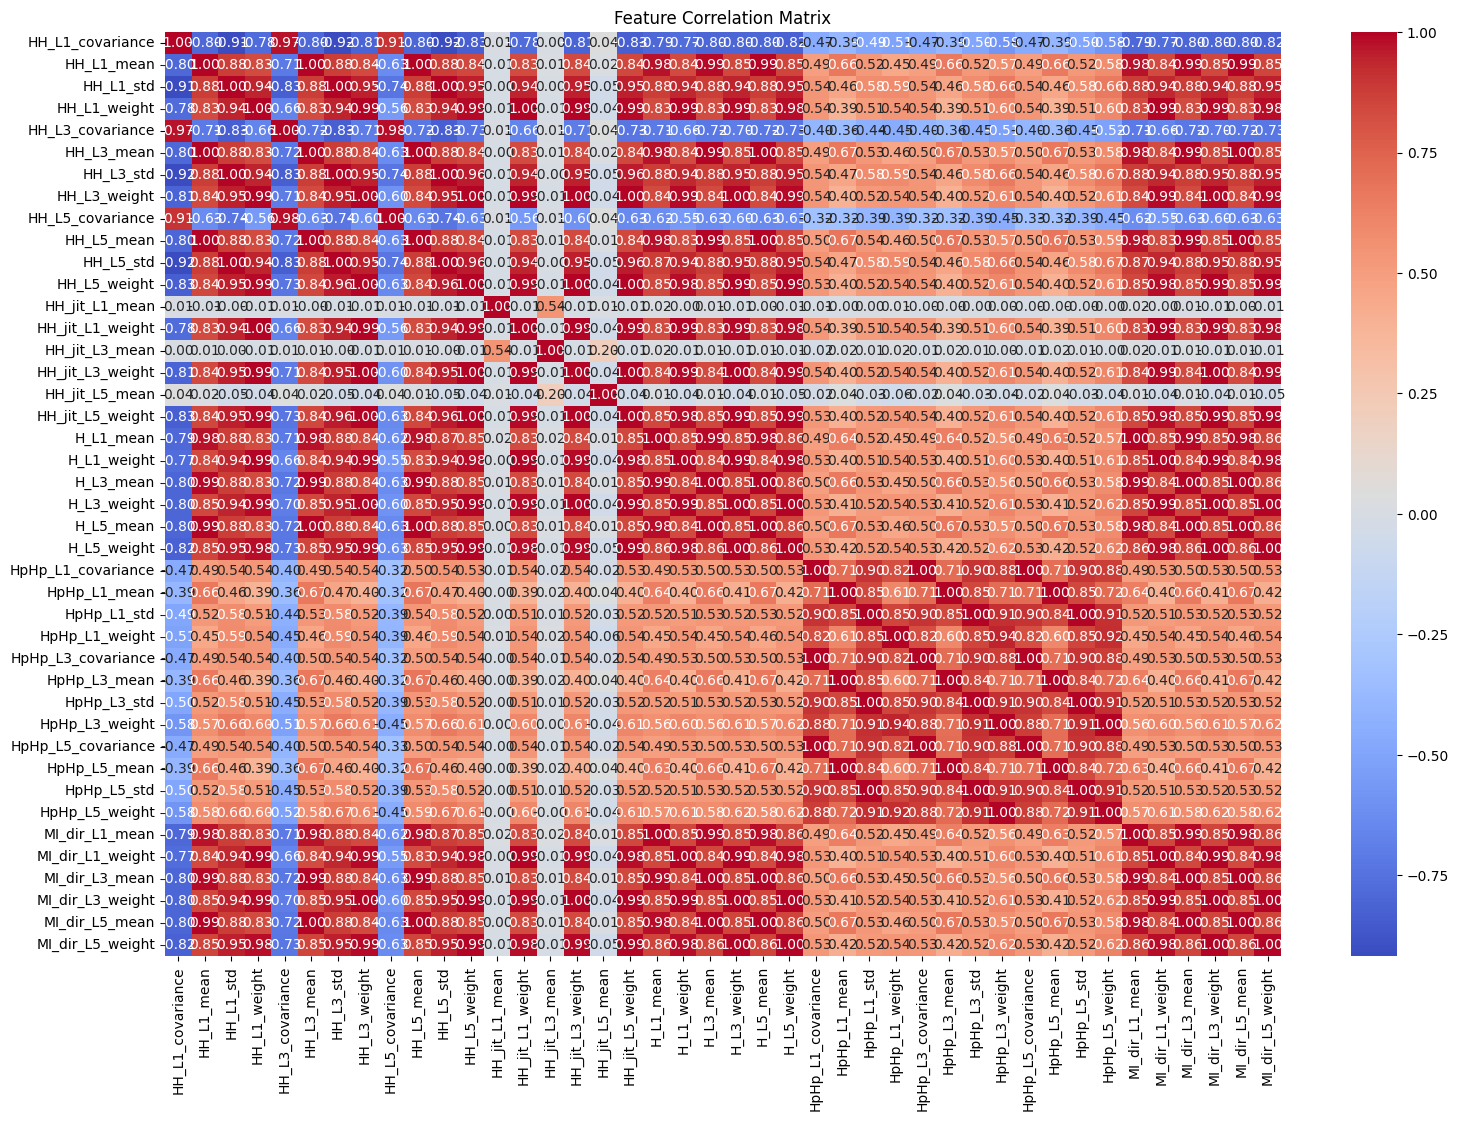

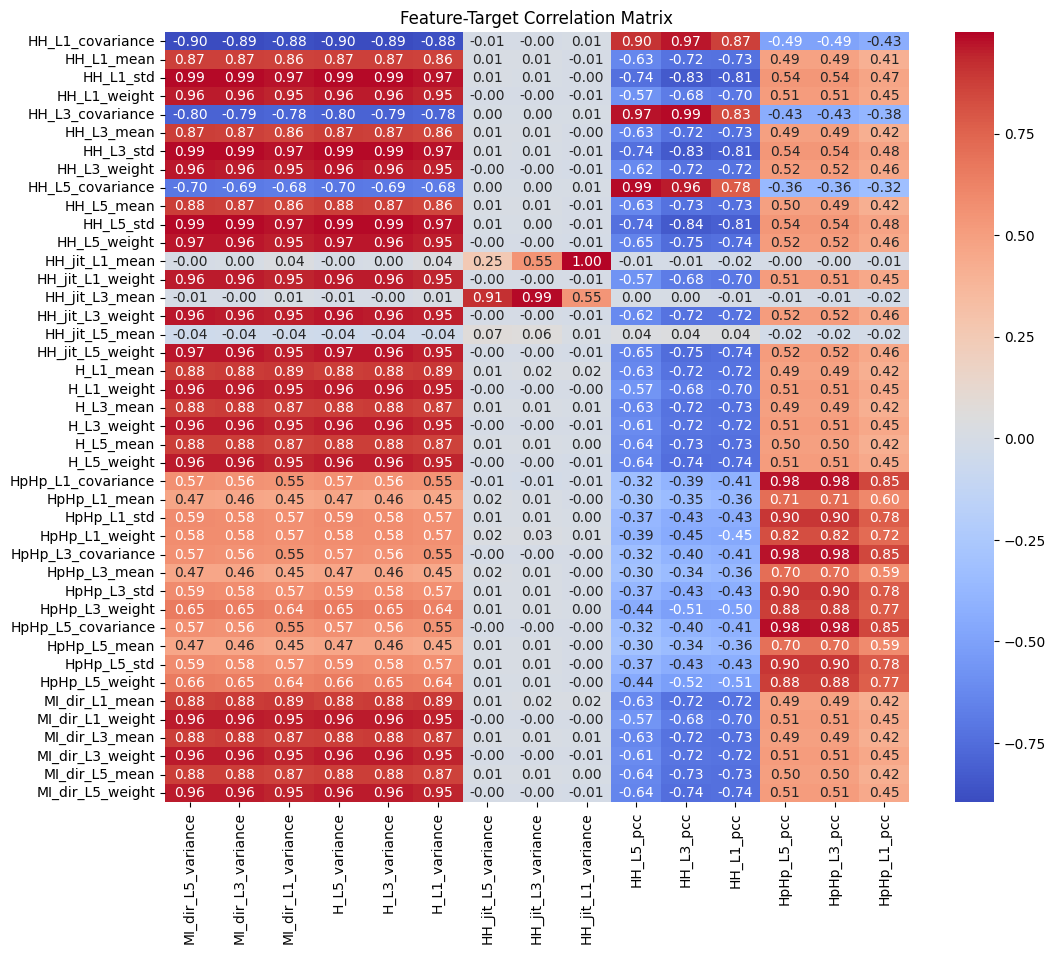

Descriptive Statistics for Features:
       HH_L1_covariance    HH_L1_mean     HH_L1_std  HH_L1_weight  \
count      5.266500e+04  52665.000000  5.266500e+04  52665.000000   
mean      -1.744985e+03     82.614930  2.221486e+01      5.206754   
std        5.719677e+03     29.823293  6.352011e+01     13.410728   
min       -3.227621e+04     60.000000  0.000000e+00      1.000000   
25%       -2.560000e-32     60.000000  6.740000e-07      1.000000   
50%        0.000000e+00     73.986906  1.650000e-06      1.000000   
75%        9.270000e-93     90.000000  2.210962e+00      1.750181   
max        1.516068e+04    183.241179  2.555418e+02     72.625885   

       HH_L3_covariance    HH_L3_mean     HH_L3_std  HH_L3_weight  \
count      5.266500e+04  52665.000000  52665.000000  52665.000000   
mean      -1.269997e+03     82.793887     21.840312      4.348048   
std        4.517661e+03     30.145113     64.225101     10.812136   
min       -2.768007e+04     60.000000      0.000000      1.000000

In [ ]:
# Define target columns
target_columns = [
    'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]

# Extract feature columns (excluding target columns)
feature_columns = df_cleaned.columns.difference(target_columns)

# Extract features and targets
X = df_cleaned[feature_columns]
y = df_cleaned[target_columns]

# Compute correlation matrix for features
feature_correlation_matrix = X.corr()

# Plot the correlation matrix for features
plt.figure(figsize=(18, 12))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Compute correlation matrix for features with each target variable
target_correlation_matrix = pd.DataFrame({target: X.corrwith(df_cleaned[target]) for target in target_columns})

# Plot the correlation matrix for features with each target variable
plt.figure(figsize=(12, 10))
sns.heatmap(target_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature-Target Correlation Matrix')
plt.show()

# Descriptive statistics for features
print("Descriptive Statistics for Features:")
print(X.describe())

# Descriptive statistics for target variables
print("\nDescriptive Statistics for Target Variables:")
print(y.describe())


In [ ]:
# Define features
target_columns = [
                     'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]
feature_columns = df.columns.difference(target_columns)

X = df_cleaned[feature_columns]

# Compute the correlation matrix for features
correlation_matrix = X.corr()
# Define the threshold for highly correlated features
high_corr_threshold = 3
# Extract pairs of highly correlated features
def get_highly_correlated_features(corr_matrix, threshold):
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return corr_pairs

high_corr_pairs = get_highly_correlated_features(correlation_matrix, high_corr_threshold)

# Print the highly correlated pairs
print("Highly Correlated Features (Correlation > 3):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Highly Correlated Features (Correlation > 3):


Distance Matrix:
                    HH_L1_covariance  HH_L1_mean  HH_L1_std  HH_L1_weight  \
HH_L1_covariance            0.000000    1.795037   1.914907      1.779975   
HH_L1_mean                  1.795037    0.000000   0.122675      0.169089   
HH_L1_std                   1.914907    0.122675   0.000000      0.058211   
HH_L1_weight                1.779975    0.169089   0.058211      0.000000   
HH_L3_covariance            0.029470    1.713402   1.828231      1.664596   
HH_L3_mean                  1.797156    0.000836   0.123155      0.170361   
HH_L3_std                   1.916315    0.123836   0.001174      0.057740   
HH_L3_weight                1.810541    0.160004   0.050221      0.005126   
HH_L5_covariance            0.090311    1.628114   1.735680      1.555011   
HH_L5_mean                  1.800133    0.001673   0.123025      0.171307   
HH_L5_std                   1.917251    0.124316   0.001678      0.058169   
HH_L5_weight                1.831245    0.156237   0.045549

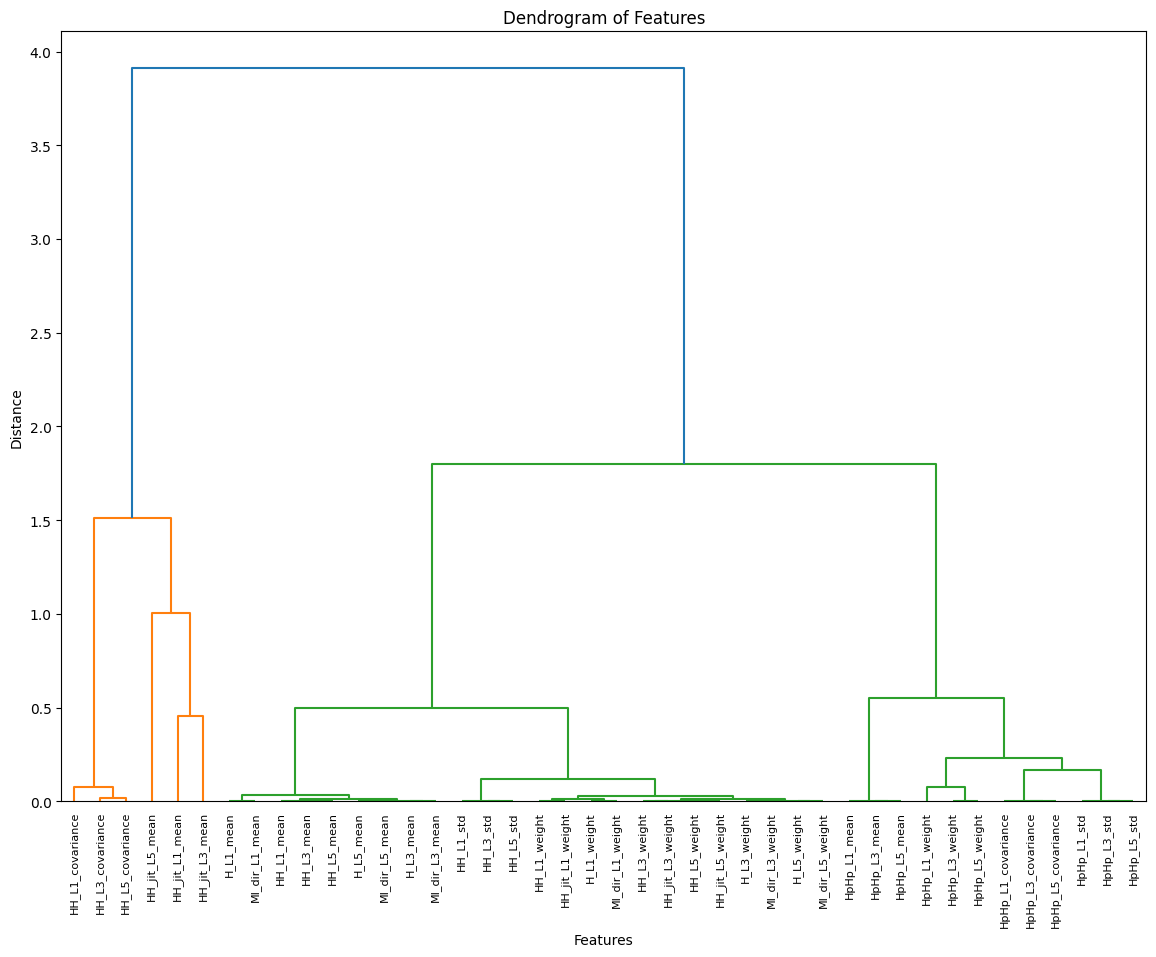

Cluster Summary:
   Cluster                                            Feature
0        1  [HH_L1_covariance, HH_L3_covariance, HH_L5_cov...
1        2                   [HH_jit_L1_mean, HH_jit_L3_mean]
2        3                                   [HH_jit_L5_mean]
3        4  [HH_L1_mean, HH_L1_std, HH_L1_weight, HH_L3_me...
4        5  [HpHp_L1_covariance, HpHp_L1_mean, HpHp_L1_std...


In [ ]:
# Assuming X is your DataFrame of feature columns
correlation_matrix = X.corr()

# Convert correlation matrix to distance matrix
distance_matrix = 1 - correlation_matrix

# Make sure the distance matrix is in condensed form
condensed_distance_matrix = squareform(distance_matrix)

# Create linkage matrix
linkage_matrix = sch.linkage(condensed_distance_matrix, method='ward')

print("Distance Matrix:")
print(distance_matrix)

print("Condensed Distance Matrix:")
print(condensed_distance_matrix)

# Plot dendrogram
plt.figure(figsize=(14, 10))
dendrogram = sch.dendrogram(linkage_matrix, labels=X.columns, leaf_rotation=90)
plt.title('Dendrogram of Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

# Generate cluster labels
max_d = 0.7  # Example threshold for distance to form clusters, you can adjust this
cluster_labels = fcluster(linkage_matrix, max_d, criterion='distance')

# Create a DataFrame to hold cluster information
feature_clusters = pd.DataFrame({
    'Feature': X.columns,
    'Cluster': cluster_labels
})

# Summarize clusters
cluster_summary = feature_clusters.groupby('Cluster')['Feature'].apply(list).reset_index()
print("Cluster Summary:")
print(cluster_summary)

               Feature  Cluster
0     HH_L1_covariance        1
1           HH_L1_mean        2
2            HH_L1_std        2
3         HH_L1_weight        2
4     HH_L3_covariance        1
5           HH_L3_mean        2
6            HH_L3_std        2
7         HH_L3_weight        2
8     HH_L5_covariance        1
9           HH_L5_mean        2
10           HH_L5_std        2
11        HH_L5_weight        2
12      HH_jit_L1_mean        1
13    HH_jit_L1_weight        2
14      HH_jit_L3_mean        1
15    HH_jit_L3_weight        2
16      HH_jit_L5_mean        1
17    HH_jit_L5_weight        2
18           H_L1_mean        2
19         H_L1_weight        2
20           H_L3_mean        2
21         H_L3_weight        2
22           H_L5_mean        2
23         H_L5_weight        2
24  HpHp_L1_covariance        2
25        HpHp_L1_mean        2
26         HpHp_L1_std        2
27      HpHp_L1_weight        2
28  HpHp_L3_covariance        2
29        HpHp_L3_mean        2
30      

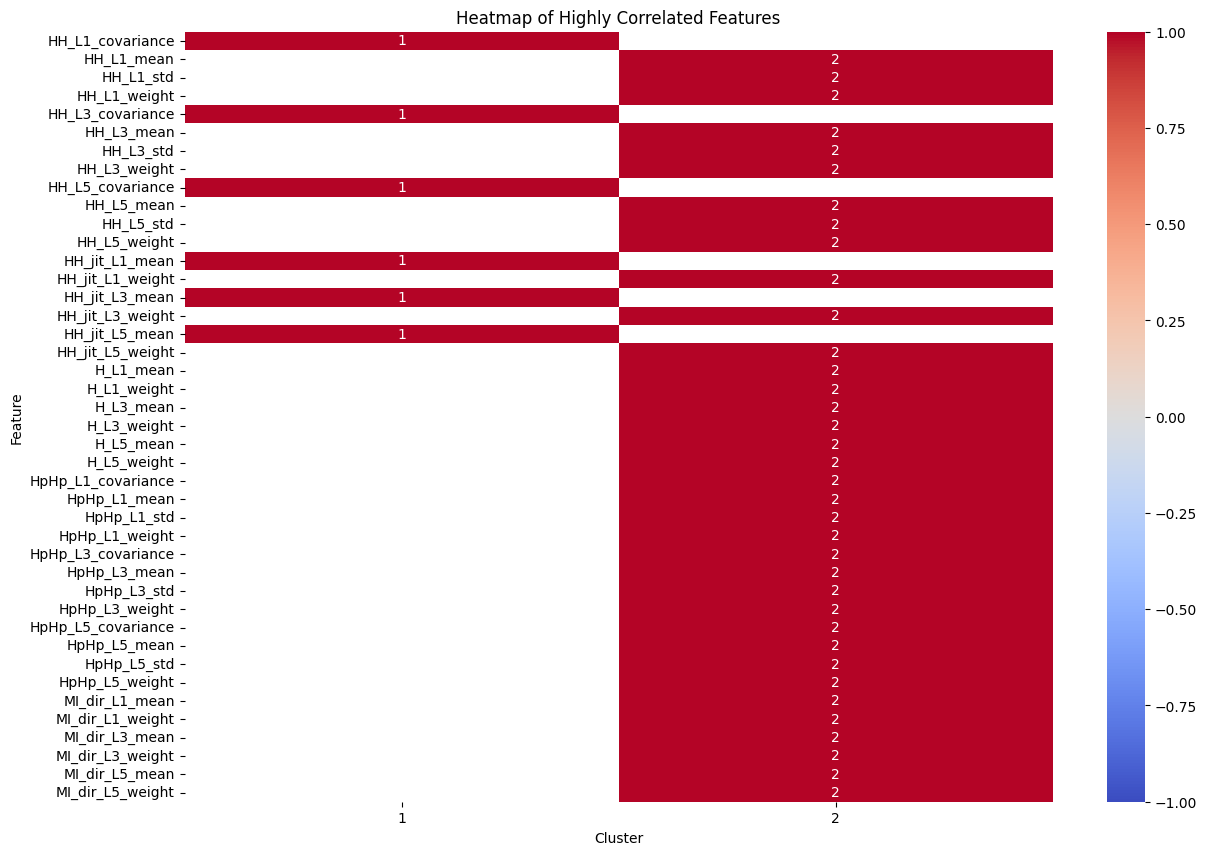

In [ ]:
# Define the maximum distance for clusters
max_distance = 2

# Get cluster labels
cluster_labels = fcluster(linkage_matrix, max_distance, criterion='distance')

# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})
print(feature_clusters)

# Create a pivot table for the heatmap
cluster_pivot = feature_clusters.pivot(index='Feature', columns='Cluster', values='Cluster')

plt.figure(figsize=(14, 10))
sns.heatmap(cluster_pivot, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Highly Correlated Features')
plt.show()

In [ ]:
# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})

# Select one feature per cluster
selected_features = feature_clusters.groupby('Cluster')['Feature'].first().values

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.97753165 0.97911392 0.97800633 0.98021839 0.97879411]
Mean Cross-Validation Accuracy: 0.9787328801424678
Validation Set Performance:
Accuracy: 0.9663291139240506
Precision: 0.7289992605718935
Recall: 0.7948042681075463
F1-Score: 0.7146414628006181
Test Set Performance:
Accuracy: 0.9775955039112934
Precision: 0.8344663576435547
Recall: 0.9056766558692693
F1-Score: 0.8507838350036935

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.98037975 0.97958861 0.97848101 0.98195917 0.97911062]
Mean Cross-Validation Accuracy: 0.9799038313224532
Validation Set Performance:
Accuracy: 0.9674683544303797
Precision: 0.728773727888623
Recall: 0.7811030718069764
F1-Score: 0.7198393021886162
Test Set Performance:
Accuracy: 0.9787347155768208
Precision: 0.8317645100239875
Recall: 0.9111184781122018
F1-Score: 0.8526048096831443

-----------

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 201, in fit
    y = self._validate_targets(y)
  File

Cross-Validation Accuracy Scores: [0.99556962 0.99525316        nan 0.99746795 0.99604368]
Mean Cross-Validation Accuracy: nan
Validation Set Performance:
Accuracy: 0.9956962025316456
Precision: 0.4999364433710436
Recall: 0.49791112799088494
F1-Score: 0.4989217303057211
Test Set Performance:
Accuracy: 0.9965064175590491
Precision: 0.499961896052431
Recall: 0.4982910527115297
F1-Score: 0.49912507608034085

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 201, in fit
    y = self._validate_targets(y)
  File

Cross-Validation Accuracy Scores: [0.99556962 0.99525316        nan 0.99746795 0.99604368]
Mean Cross-Validation Accuracy: nan
Validation Set Performance:
Accuracy: 0.9956962025316456
Precision: 0.4999364433710436
Recall: 0.49791112799088494
F1-Score: 0.4989217303057211
Test Set Performance:
Accuracy: 0.9965064175590491
Precision: 0.499961896052431
Recall: 0.4982910527115297
F1-Score: 0.49912507608034085

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Cross-Validation Accuracy Scores: [0.09462025 0.09098101 0.09731013 0.09004589 0.09289445]
Mean Cross-Validation Accuracy: 0.09317034621324878
Validation Set Performance:
Accuracy: 0.09126582278481013
Precision: 0.3329636365520529
Recall: 0.36368625464370147
F1-Score: 0.055819411167600586
Test Set Performance:
Accuracy: 0.09728867623604466
Precision: 0.33326865175617426
Recall: 0.3239484353224376
F1-Score: 0.059252106239550406

--------------------------------------------------

Training 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


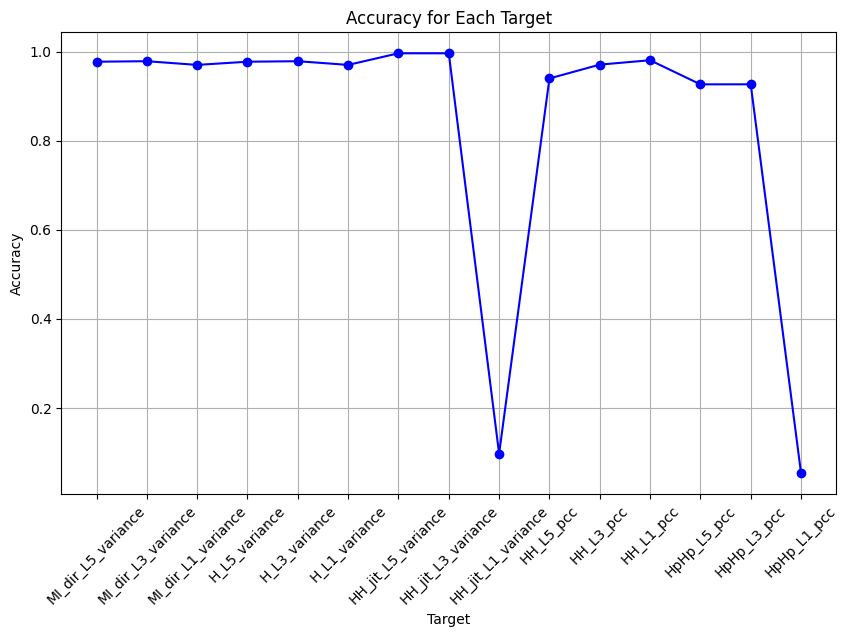

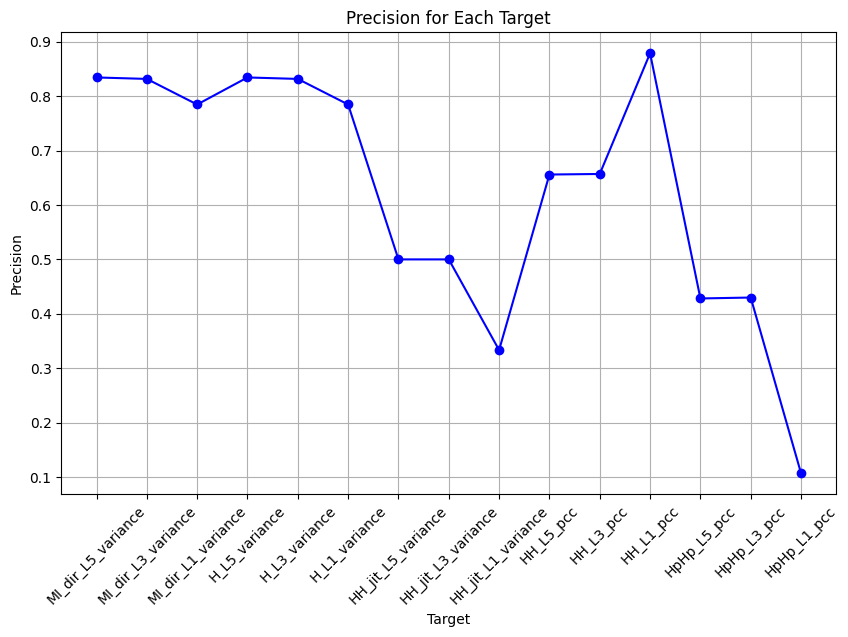

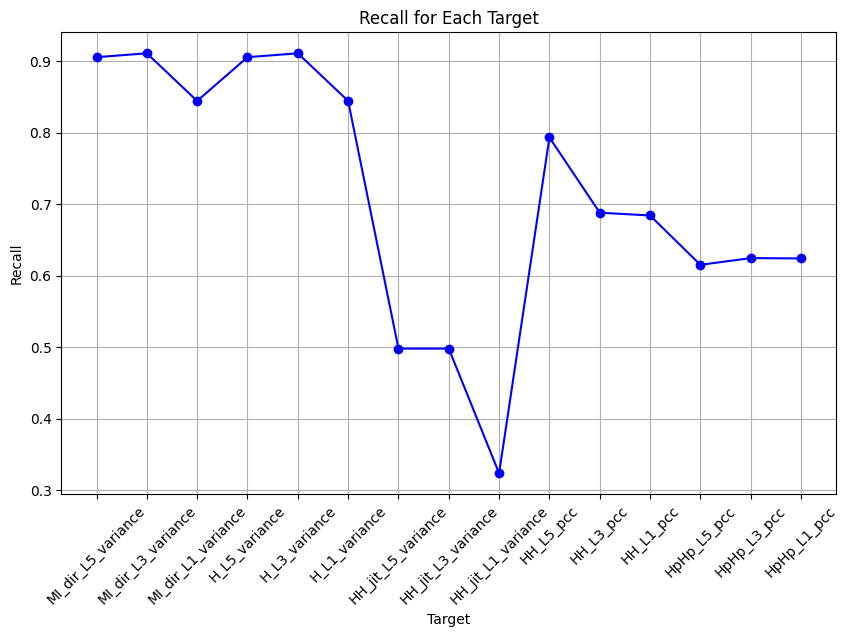

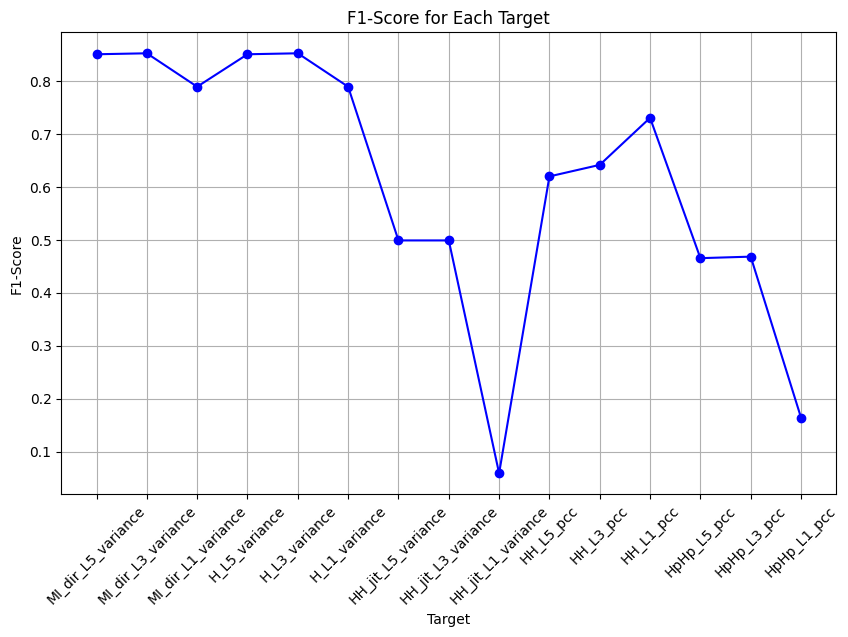

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the SVM model for classification
    model = SVC(kernel='rbf', class_weight='balanced')

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

Training model for target: MI_dir_L5_variance
Validation Set Performance:
Accuracy: 0.5324050632911392
Precision: 0.5400879116186887
Recall: 0.467766831425947
F1-Score: 0.452642948823831
Test Set Performance:
Accuracy: 0.5243411559201033
Precision: 0.466173134016201
Recall: 0.3524364708491363
F1-Score: 0.38917970796497914

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Validation Set Performance:
Accuracy: 0.5421518987341772
Precision: 0.5599426259104641
Recall: 0.4873521553849664
F1-Score: 0.48922819468138956
Test Set Performance:
Accuracy: 0.5362649046859573
Precision: 0.39792322821596626
Recall: 0.31226620003121464
F1-Score: 0.33989037525180416

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Validation Set Performance:
Accuracy: 0.5460759493670886
Precision: 0.45198753716063766
Recall: 0.3538573750099618
F1-Score: 0.3871877230018546
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Accuracy: 0.5433280170122275
Precision: 0.4125411662368184
Recall: 0.30326995027059767
F1-Score: 0.3433261593035623

--------------------------------------------------

Training model for target: H_L5_variance
Validation Set Performance:
Accuracy: 0.5324050632911392
Precision: 0.5400879116186887
Recall: 0.467766831425947
F1-Score: 0.452642948823831
Test Set Performance:
Accuracy: 0.5243411559201033
Precision: 0.466173134016201
Recall: 0.3524364708491363
F1-Score: 0.38917970796497914

--------------------------------------------------

Training model for target: H_L3_variance
Validation Set Performance:
Accuracy: 0.5421518987341772
Precision: 0.5599426259104641
Recall: 0.4873521553849664
F1-Score: 0.48922819468138956
Test Set Performance:
Accuracy: 0.5362649046859573
Precision: 0.39792322821596626
Recall: 0.31226620003121464
F1-Score: 0.33989037525180416

--------------------------------------------------

Training model for target: H_L1_variance
Validation Set Performance:
Accuracy: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

Accuracy: 0.5433280170122275
Precision: 0.4125411662368184
Recall: 0.30326995027059767
F1-Score: 0.3433261593035623

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Validation Set Performance:
Accuracy: 0.5716455696202531
Precision: 0.33325953804147296
Recall: 0.19057264632653922
F1-Score: 0.2424828178694158
Test Set Performance:
Accuracy: 0.5748462064251538
Precision: 0.3332892998678996
Recall: 0.19162995594713658
F1-Score: 0.2433449074074074

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Validation Set Performance:
Accuracy: 0.5716455696202531
Precision: 0.33325953804147296
Recall: 0.19057264632653922
F1-Score: 0.2424828178694158
Test Set Performance:
Accuracy: 0.5748462064251538
Precision: 0.3332892998678996
Recall: 0.19162995594713658
F1-Score: 0.2433449074074074

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Validation Set Perfor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Accuracy: 0.98989898989899
Precision: 0.24977004445807144
Recall: 0.24770049410870393
F1-Score: 0.24873096446700507

--------------------------------------------------

Training model for target: HH_L5_pcc
Validation Set Performance:
Accuracy: 0.9868354430379747
Precision: 0.6757206865323631
Recall: 0.7130913495864113
F1-Score: 0.6822610051372123
Test Set Performance:
Accuracy: 0.9843548264600896
Precision: 0.6772647354399058
Recall: 0.6619435413306293
F1-Score: 0.6652167729459632

--------------------------------------------------

Training model for target: HH_L3_pcc
Validation Set Performance:
Accuracy: 0.9920253164556962
Precision: 0.5621188968878351
Recall: 0.6406948540382639
F1-Score: 0.5916980887455479
Test Set Performance:
Accuracy: 0.9905825168983063
Precision: 0.5762692406240295
Recall: 0.5265334318723052
F1-Score: 0.535905779487761

--------------------------------------------------

Training model for target: HH_L1_pcc
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Accuracy: 0.950126582278481
Precision: 0.7322069806918237
Recall: 0.40308572349339344
F1-Score: 0.4392957602385416
Test Set Performance:
Accuracy: 0.9441786283891547
Precision: 0.46887179472566387
Recall: 0.3959739250503071
F1-Score: 0.42457360484482176

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Validation Set Performance:
Accuracy: 0.46810126582278483
Precision: 0.23790530108080288
Recall: 0.12031494013534617
F1-Score: 0.15980985306828002
Test Set Performance:
Accuracy: 0.46570972886762363
Precision: 0.23737999380613192
Recall: 0.11994366637978249
F1-Score: 0.1593637922968969

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Validation Set Performance:
Accuracy: 0.46810126582278483
Precision: 0.23784409570362747
Recall: 0.12033060002603149
F1-Score: 0.15980985306828002
Test Set Performance:
Accuracy: 0.4656337814232551
Precision: 0.2373412821306906
Recall: 0.11993348982785602
F1-Score: 0.1593460

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

Validation Set Performance:
Accuracy: 0.9402531645569621
Precision: 0.4322331557541887
Recall: 0.38683904966059307
F1-Score: 0.39936377975991993
Test Set Performance:
Accuracy: 0.9360522518417256
Precision: 0.4221371801874727
Recall: 0.386772444432865
F1-Score: 0.39710847423612244

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.675598086124402
Average Precision: 0.40592586186971585
Average Recall: 0.3185337431465747
Average F1-Score: 0.3481151849337193


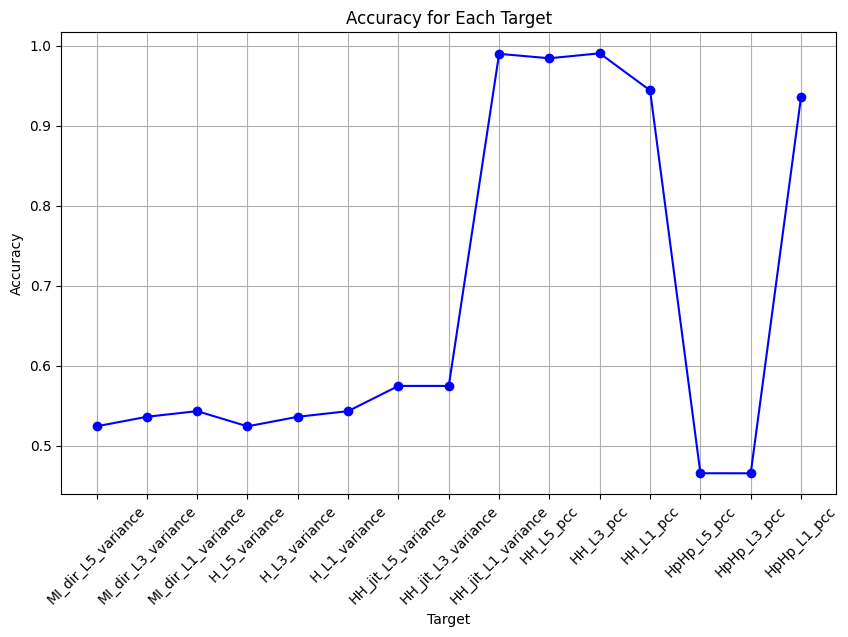

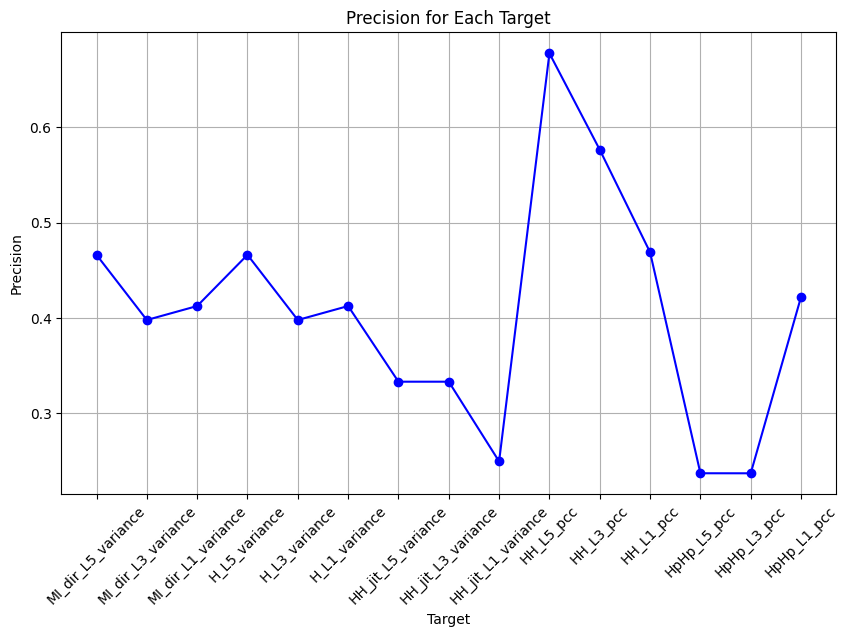

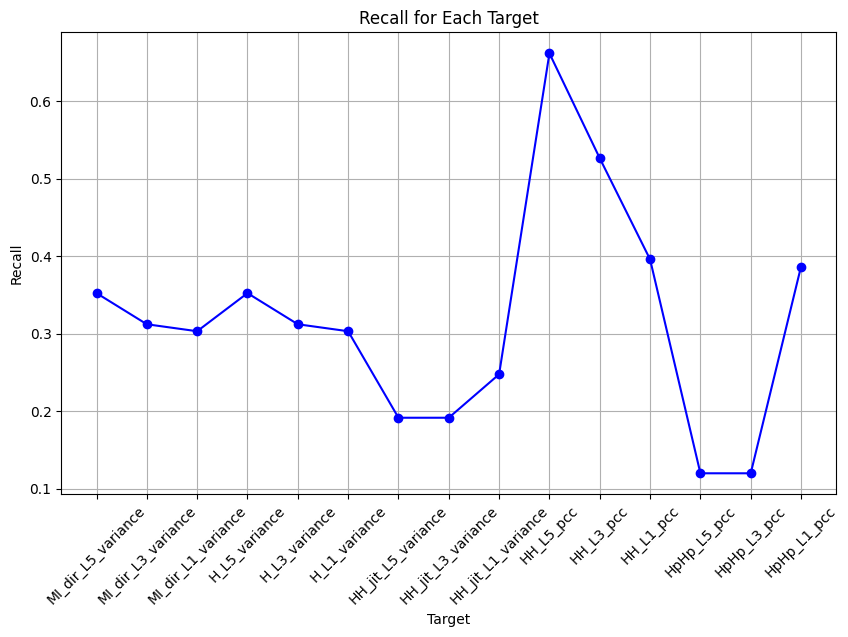

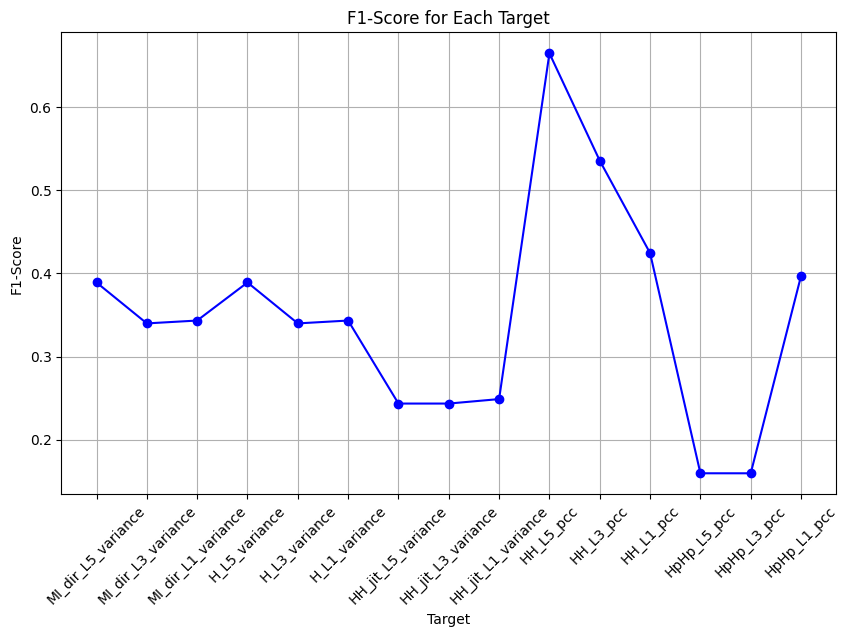

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Train the model
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Discretize the continuous predictions into bins
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.97927215 0.98085443 0.9818038  0.98385821 0.98322519]
Mean Cross-Validation Accuracy: 0.9818027558037745
Validation Set Performance:
Accuracy: 0.9140506329113924
Precision: 0.3191327391973238
Recall: 0.41030597701679783
F1-Score: 0.3470681103046177
Test Set Performance:
Accuracy: 0.9233690286321865
Precision: 0.40867067039533
Recall: 0.4622408797353072
F1-Score: 0.4315819471693363

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.9818038  0.98417722 0.98227848 0.98544073 0.98385821]
Mean Cross-Validation Accuracy: 0.9835116866753072
Validation Set Performance:
Accuracy: 0.9132911392405063
Precision: 0.3305916920196888
Recall: 0.4032990110572193
F1-Score: 0.35600948036696
Test Set Performance:
Accuracy: 0.9197235513024987
Precision: 0.40623744199988143
Recall: 0.45499597437885064
F1-Score: 0.42732577424584317

--------------------------------------------------

Training model for target: MI_dir_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.97737342 0.97848101 0.98117089 0.97990188 0.97942712]
Mean Cross-Validation Accuracy: 0.9792708648420175
Validation Set Performance:
Accuracy: 0.91
Precision: 0.36570613855668116
Recall: 0.3847452209436492
F1-Score: 0.3746040717701977
Test Set Performance:
Accuracy: 0.9076479076479076
Precision: 0.3896188841460497
Recall: 0.39387295308286796
F1-Score: 0.3917252252162481

--------------------------------------------------

Training model for target: H_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.97927215 0.98085443 0.9818038  0.98385821 0.98322519]
Mean Cross-Validation Accuracy: 0.9818027558037745
Validation Set Performance:
Accuracy: 0.9140506329113924
Precision: 0.3191327391973238
Recall: 0.41030597701679783
F1-Score: 0.3470681103046177
Test Set Performance:
Accuracy: 0.9233690286321865
Precision: 0.40867067039533
Recall: 0.4622408797353072
F1-Score: 0.4315819471693363

--------------------------------------------------

Training model for target: H_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.9818038  0.98417722 0.98227848 0.98544073 0.98385821]
Mean Cross-Validation Accuracy: 0.9835116866753072
Validation Set Performance:
Accuracy: 0.9132911392405063
Precision: 0.3305916920196888
Recall: 0.4032990110572193
F1-Score: 0.35600948036696
Test Set Performance:
Accuracy: 0.9197235513024987
Precision: 0.40623744199988143
Recall: 0.45499597437885064
F1-Score: 0.42732577424584317

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.97737342 0.97848101 0.98117089 0.97990188 0.97942712]
Mean Cross-Validation Accuracy: 0.9792708648420175
Validation Set Performance:
Accuracy: 0.91
Precision: 0.36570613855668116
Recall: 0.3847452209436492
F1-Score: 0.3746040717701977
Test Set Performance:
Accuracy: 0.9076479076479076
Precision: 0.3896188841460497
Recall: 0.39387295308286796
F1-Score: 0.3917252252162481

--------------------------------------------------

Training model for target: HH_jit_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [1.         1.         0.99984177 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999683544303798
Validation Set Performance:
Accuracy: 0.9998734177215189
Precision: 0.49993670886075947
Recall: 0.5
F1-Score: 0.4999683524273688
Test Set Performance:
Accuracy: 0.9999240525556315
Precision: 0.4999620262778158
Recall: 0.5
F1-Score: 0.49998101241787873

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.99984177 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999683544303798
Validation Set Performance:
Accuracy: 0.9998734177215189
Precision: 0.49993670886075947
Recall: 0.5
F1-Score: 0.4999683524273688
Test Set Performance:
Accuracy: 0.9999240525556315
Precision: 0.4999620262778158
Recall: 0.5
F1-Score: 0.49998101241787873

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99936709 0.99936709 0.99936709 0.99952524 0.99952524]
Mean Cross-Validation Accuracy: 0.9994303496988188
Validation Set Performance:
Accuracy: 0.999493670886076
Precision: 0.24990505127231294
Recall: 0.25
F1-Score: 0.24995251661918327
Test Set Performance:
Accuracy: 0.999088630667578
Precision: 0.33302954355585934
Recall: 0.3333333333333333
F1-Score: 0.3331813691968695

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.98813291 0.98829114 0.98892405 0.99097959 0.99113784]
Mean Cross-Validation Accuracy: 0.9894931049817609
Validation Set Performance:
Accuracy: 0.9788607594936709
Precision: 0.4866907183845042
Recall: 0.4049142561148409
F1-Score: 0.4364179432435712
Test Set Performance:
Accuracy: 0.974329763803448
Precision: 0.4809789182522143
Recall: 0.39463603419072757
F1-Score: 0.4267426325767403

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.9931962  0.99129747 0.99272152 0.99414464 0.99272037]
Mean Cross-Validation Accuracy: 0.9928160400319712
Validation Set Performance:
Accuracy: 0.980886075949367
Precision: 0.4889414563471479
Recall: 0.4282368639776746
F1-Score: 0.453656380130988
Test Set Performance:
Accuracy: 0.9763043973570289
Precision: 0.4899207738798113
Recall: 0.41687392132658396
F1-Score: 0.44592830558647223

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99810127 0.99667722 0.99731013 0.99810097 0.9969932 ]
Mean Cross-Validation Accuracy: 0.9974365536126731
Validation Set Performance:
Accuracy: 0.9879746835443038
Precision: 0.49804652866701027
Recall: 0.4877963760496793
F1-Score: 0.4927763040837798
Test Set Performance:
Accuracy: 0.9894433052327789
Precision: 0.49742976903528446
Recall: 0.494794133129966
F1-Score: 0.49610166585407134

--------------------------------------------------

Training model for target: HpHp_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.97025316 0.97294304 0.97072785 0.97072322 0.96929894]
Mean Cross-Validation Accuracy: 0.9707892412074495
Validation Set Performance:
Accuracy: 0.9631645569620253
Precision: 0.24494591810455832
Recall: 0.24755986465382612
F1-Score: 0.24624595469255664
Test Set Performance:
Accuracy: 0.9589883800410116
Precision: 0.24470930232558138
Recall: 0.246987716141147
F1-Score: 0.24584323040380043

--------------------------------------------------

Training model for target: HpHp_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.97025316 0.97294304 0.97072785 0.97056496 0.96961545]
Mean Cross-Validation Accuracy: 0.9708208917850726
Validation Set Performance:
Accuracy: 0.9629113924050633
Precision: 0.49500708671562943
Recall: 0.37249446830665106
F1-Score: 0.4129111629111629
Test Set Performance:
Accuracy: 0.9584567479304321
Precision: 0.2446874515278424
Recall: 0.2468701095461659
F1-Score: 0.24577393471995015

--------------------------------------------------

Training model for target: HpHp_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.96867089 0.97151899 0.96835443 0.96882418 0.96834942]
Mean Cross-Validation Accuracy: 0.9691435814431462
Validation Set Performance:
Accuracy: 0.9587341772151898
Precision: 0.4946949602122016
Recall: 0.49463547476868563
F1-Score: 0.49465236620661834
Test Set Performance:
Accuracy: 0.9538239538239538
Precision: 0.49436945930836196
Recall: 0.4934687776683479
F1-Score: 0.49390466756571116

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.954117617275512
Average Precision: 0.41294021756820737
Average Recall: 0.41661224264868824
Average F1-Score: 0.4125802482668152


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

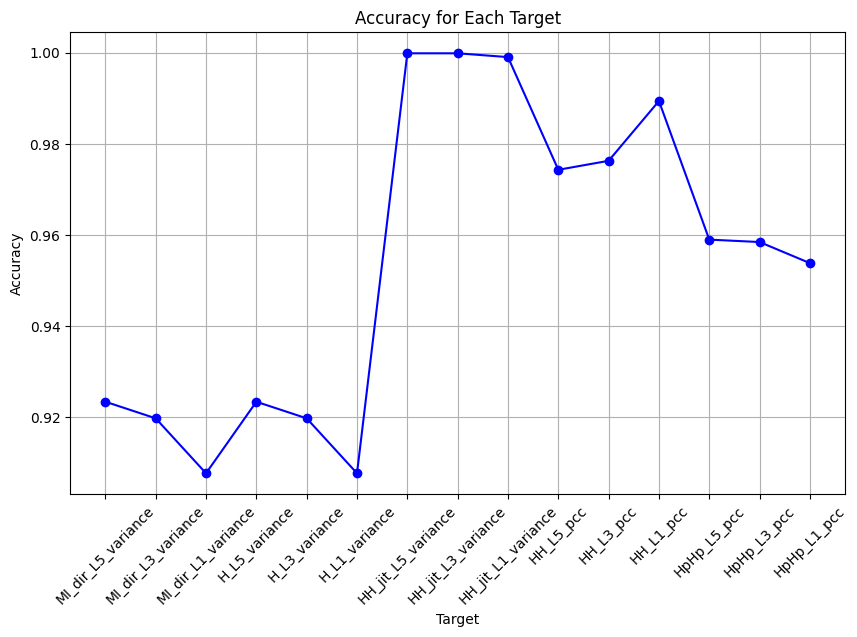

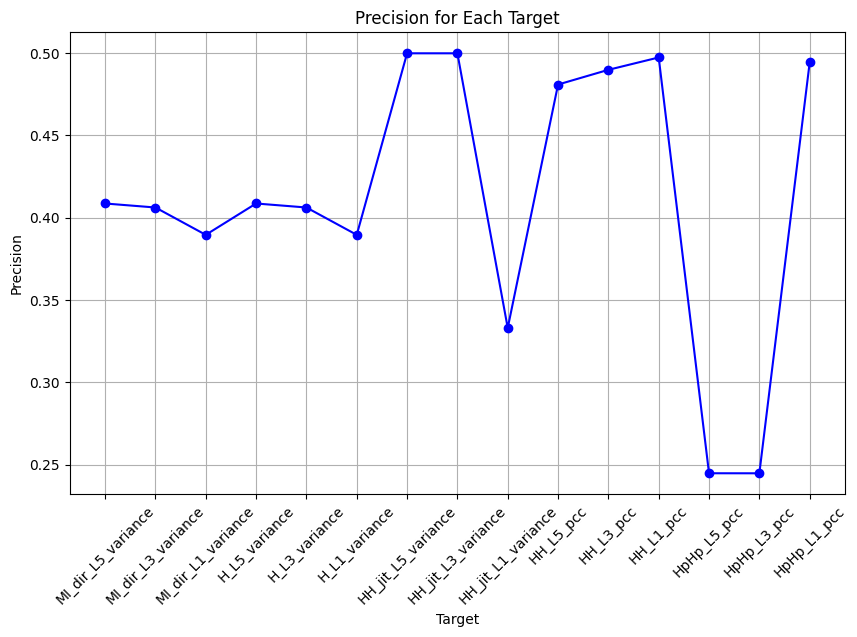

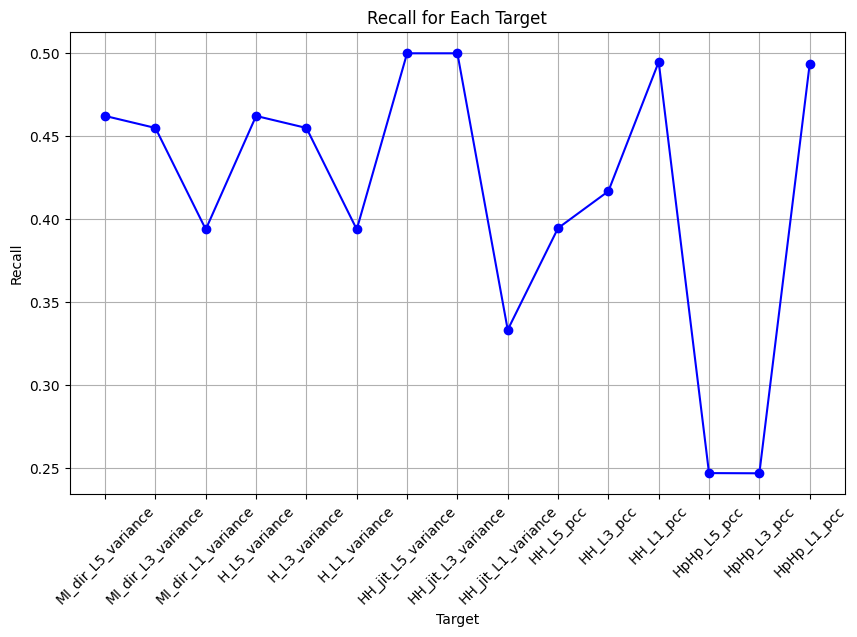

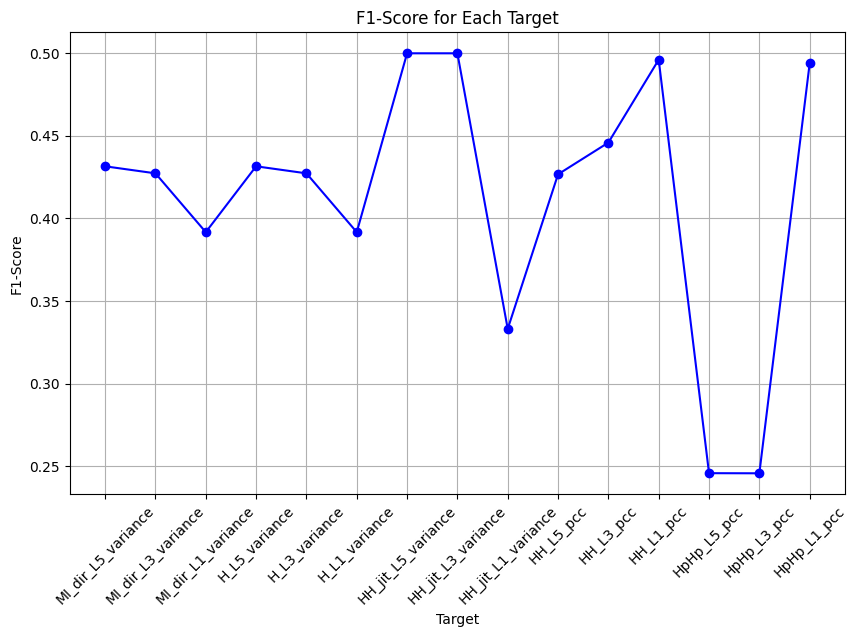

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(knn_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    knn_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = knn_model.predict(X_valid)
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = knn_model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.98164557 0.98322785 0.98132911 0.98259218 0.98259218]
Mean Cross-Validation Accuracy: 0.9822773792520447
Validation Set Performance:
Accuracy: 0.9777215189873417
Precision: 0.7906517396505933
Recall: 0.9173546478323787
F1-Score: 0.8201581868579674
Test Set Performance:
Accuracy: 0.9852661957925116
Precision: 0.8790021083860798
Recall: 0.9400453459397804
F1-Score: 0.9051088907331785

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.9846519  0.98449367 0.98306962 0.98528248 0.98243393]
Mean Cross-Validation Accuracy: 0.9839863201395831
Validation Set Performance:
Accuracy: 0.9813924050632912
Precision: 0.8166938398679972
Recall: 0.9256525051886123
F1-Score: 0.849725012158943
Test Set Performance:
Accuracy: 0.9861775651249336
Precision: 0.8811796601884558
Recall: 0.9264168215952572
F1-Score: 0.9021414381113493

-----------

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:245: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:245: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predict

Cross-Validation Accuracy Scores: [1.         1.         0.99984177 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999683544303798
Validation Set Performance:
Accuracy: 0.9998734177215189
Precision: 0.49993670886075947
Recall: 0.5
F1-Score: 0.4999683524273688
Test Set Performance:
Accuracy: 0.9999240525556315
Precision: 0.4999620262778158
Recall: 0.5
F1-Score: 0.49998101241787873

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Cross-Validation Accuracy Scores: [0.99936709 0.99936709 0.63417722 0.99952524 0.99952524]
Mean Cross-Validation Accuracy: 0.9263923750152744
Validation Set Performance:
Accuracy: 0.999493670886076
Precision: 0.33316455696202535
Recall: 0.3333333333333333
F1-Score: 0.33324892377817167
Test Set Performance:
Accuracy: 0.999088630667578
Precision: 0.33302954355585934
Recall: 0.3333333333333333
F1-Score: 0.3331813691968695

--------------------------------------------------

Training model for target: HH_L

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:245: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:245: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classificat

Cross-Validation Accuracy Scores: [0.93892405 0.94287975 0.93670886 0.94445324 0.94002216]
Mean Cross-Validation Accuracy: 0.9405976099807493
Validation Set Performance:
Accuracy: 0.9564556962025317
Precision: 0.5982731051278142
Recall: 0.7101692189197069
F1-Score: 0.6247425338073586
Test Set Performance:
Accuracy: 0.9564061669324827
Precision: 0.5987700106697956
Recall: 0.7310053197022905
F1-Score: 0.6264697620046481

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [0.95474684 0.95664557 0.95237342 0.95505618 0.95284064]
Mean Cross-Validation Accuracy: 0.9543325283803517
Validation Set Performance:
Accuracy: 0.9696202531645569
Precision: 0.7748976433537647
Recall: 0.7873114410009889
F1-Score: 0.7586259917584107
Test Set Performance:
Accuracy: 0.06463127515759094
Precision: 0.232310258567334
Recall: 0.66429418742586
F1-Score: 0.27350647904997544

--------------------------------------------------

Training model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.96329114 0.96202532 0.96155063 0.96771641 0.9643931 ]
Mean Cross-Validation Accuracy: 0.9637953199212342
Validation Set Performance:
Accuracy: 0.09417721518987342
Precision: 0.29702268316253105
Recall: 0.6210147451526762
F1-Score: 0.2991357680512963
Test Set Performance:
Accuracy: 0.9681020733652312
Precision: 0.9521066054089911
Recall: 0.6287118488048052
F1-Score: 0.6338706215373354

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Cross-Validation Accuracy Scores: [0.94018987 0.93924051 0.93781646 0.94366197 0.93828137]
Mean Cross-Validation Accuracy: 0.9398380361818186
Validation Set Performance:
Accuracy: 0.9420253164556962
Precision: 0.44426020603994903
Recall: 0.6408424228056755
F1-Score: 0.48904170429872457
Test Set Performance:
Accuracy: 0.9365079365079365
Precision: 0.4438691833281904
Recall: 0.6390421509458644
F1-Score: 0.48752122604184045

--------------------------------------------------

Traini

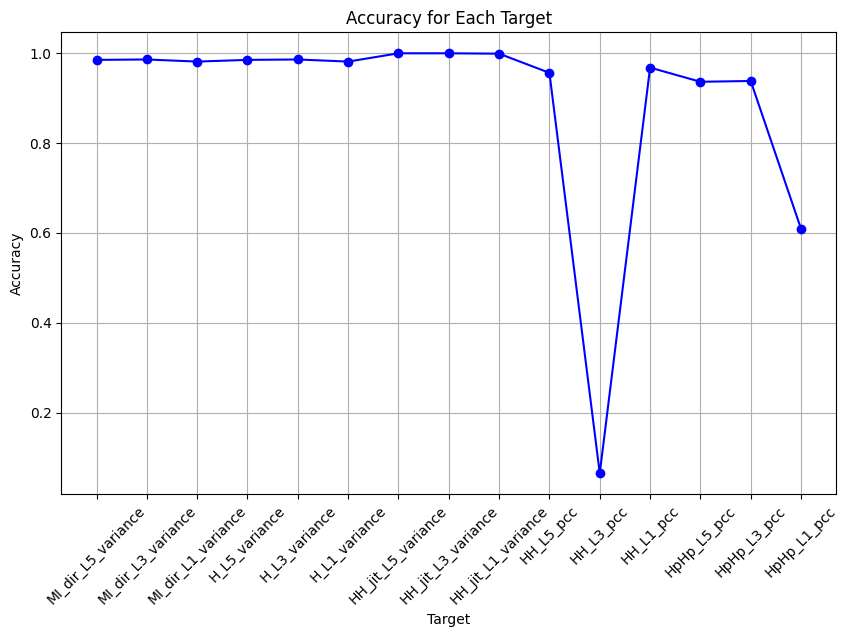

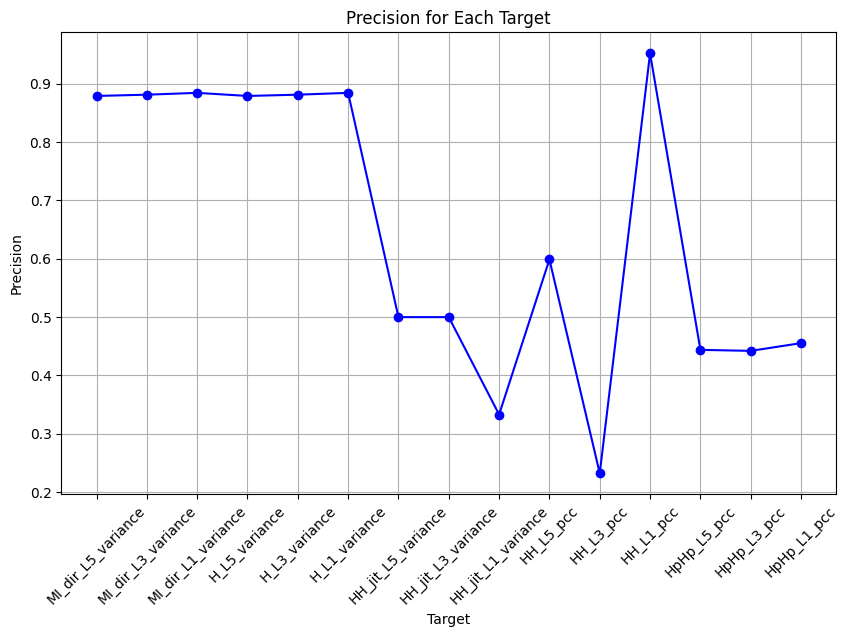

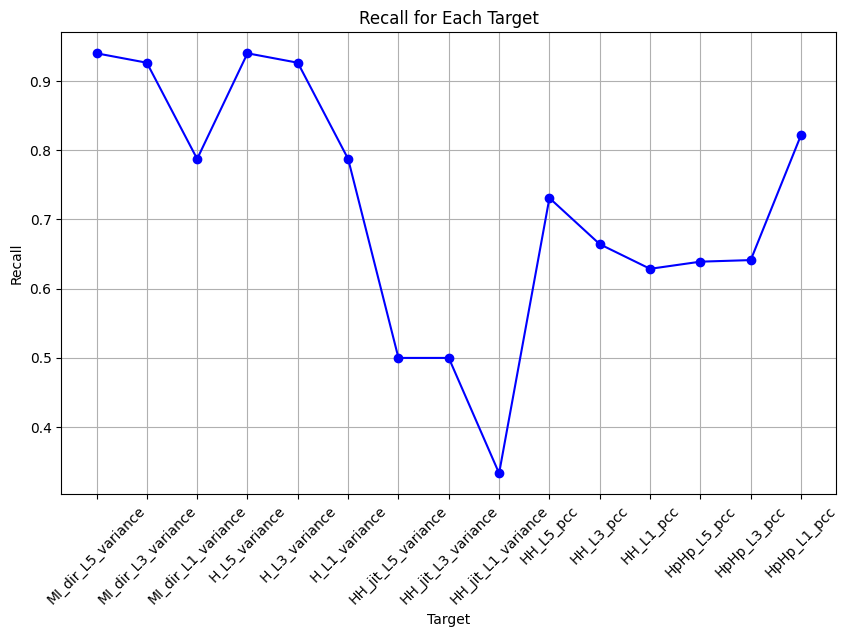

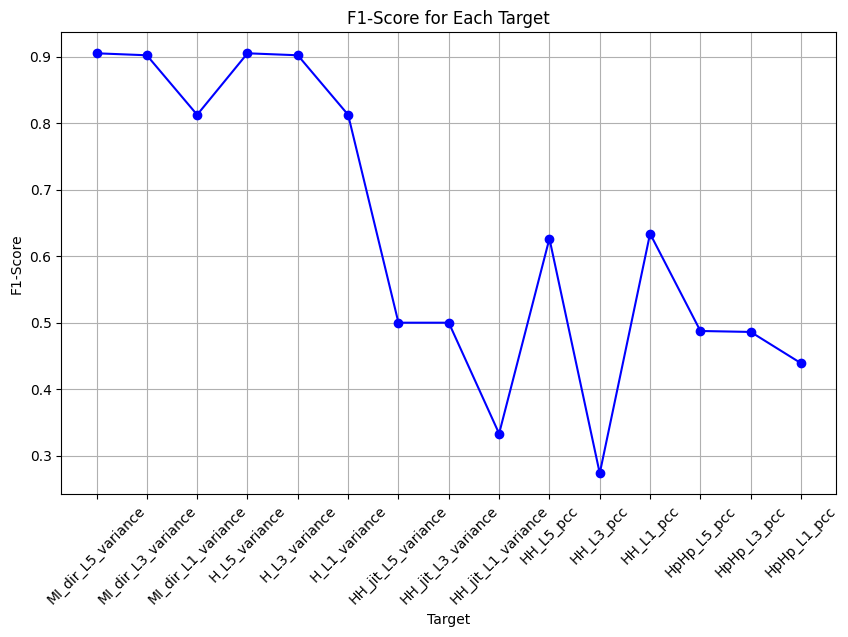

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Naive Bayes model (Gaussian Naive Bayes for continuous features)
nb_model = GaussianNB()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(nb_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    nb_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = nb_model.predict(X_valid)
    y_valid_pred_binned = bin_targets(pd.DataFrame(y_valid_pred, columns=[target]))

    # Predict on the test set
    y_test_pred = nb_model.predict(X_test)
    y_test_pred_binned = bin_targets(pd.DataFrame(y_test_pred, columns=[target]))

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned[target])
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned[target])
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.99636076 0.99414557 0.99462025 0.99620193 0.99620193]
Mean Cross-Validation Accuracy: 0.9955060887297901
Validation Set Performance:
Accuracy: 0.9720253164556962
Precision: 0.758154350332557
Recall: 0.7827111571513958
F1-Score: 0.7414773830343472
Test Set Performance:
Accuracy: 0.9886838307890939
Precision: 0.903307100990253
Recall: 0.9357186224353103
F1-Score: 0.9133794878961012

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.99620253 0.99541139 0.99382911 0.99620193 0.99556892]
Mean Cross-Validation Accuracy: 0.9954427775585385
Validation Set Performance:
Accuracy: 0.9772151898734177
Precision: 0.7804208242735086
Recall: 0.8061870001421201
F1-Score: 0.7756451144120721
Test Set Performance:
Accuracy: 0.9894433052327789
Precision: 0.9013011536134655
Recall: 0.9361902213740886
F1-Score: 0.9138008957079369

------------

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/pytho

Cross-Validation Accuracy Scores: [1.         1.         0.99984177 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999683544303798
Validation Set Performance:
Accuracy: 0.9998734177215189
Precision: 0.49993670886075947
Recall: 0.5
F1-Score: 0.4999683524273688
Test Set Performance:
Accuracy: 0.9999240525556315
Precision: 0.4999620262778158
Recall: 0.5
F1-Score: 0.49998101241787873

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Cross-Validation Accuracy Scores: [0.99920886 0.99968354 0.99952532 0.99952524 0.99952524]
Mean Cross-Validation Accuracy: 0.9994936408380592
Validation Set Performance:
Accuracy: 0.9996202531645569
Precision: 0.555471135311581
Recall: 0.6666244511989193
F1-Score: 0.5999366808079529
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9994683678894205
Precision: 0.6665400010133252
Recall: 0.6249493221842138
F1-Score: 0.6443557683781148

--------------------------------------------------

Training model for target: HH_L5_pcc
Cross-Validation Accuracy Scores: [0.98765823 0.98734177 0.98924051 0.98908055 0.99082133]
Mean Cross-Validation Accuracy: 0.9888284779076966
Validation Set Performance:
Accuracy: 0.9779746835443038
Precision: 0.7271148187946651
Recall: 0.728404014479079
F1-Score: 0.6938149693436979
Test Set Performance:
Accuracy: 0.9725070251386041
Precision: 0.7081891467070504
Recall: 0.6895993608681206
F1-Score: 0.6604729121168557

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [0.9931962  0.99129747 0.99193038 0.99224561 0.99208736]
Mean Cross-Validation Accuracy: 0.9921514029419012
Validation Set Performance:
Accuracy: 0.9815189873417721
Precision: 0.7738391821789158
Recall: 0.9029337299447343
F1-Score: 0.7803887743259129

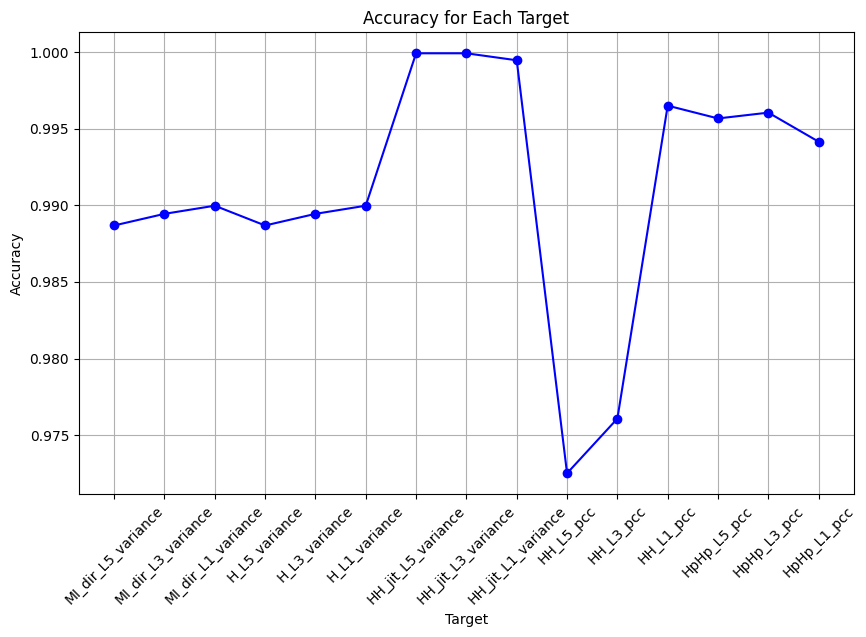

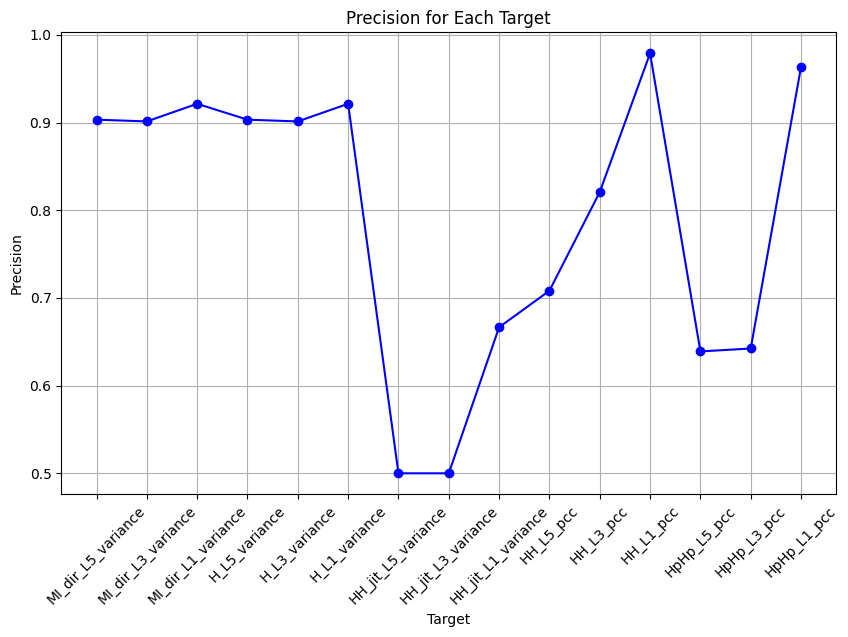

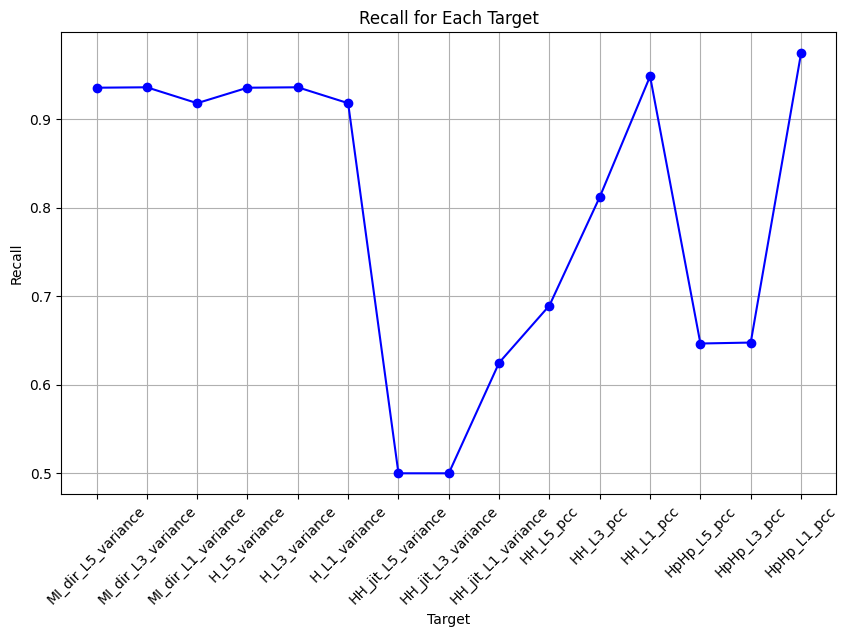

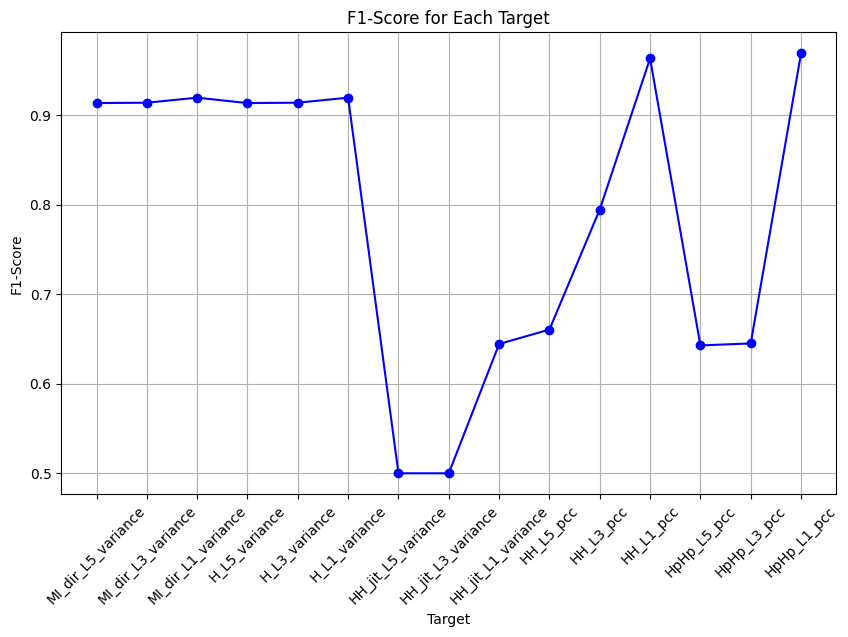

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Ensure target_columns is defined and not empty
if 'target_columns' in locals() and target_columns:
    # Train and evaluate the model for each target column
    for target in target_columns:
        print(f"Training model for target: {target}")

        # Initialize the Random Forest model
        rf_model = DecisionTreeClassifier(random_state=42)

        # Perform cross-validation
        cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
        print(f"Cross-Validation Accuracy Scores: {cv_scores}")
        print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

        # Train the model on the full training set
        rf_model.fit(X_train, y_train_binned[target])

        # Predict on the validation set
        y_valid_pred = rf_model.predict(X_valid)

        # Predict on the test set
        y_test_pred = rf_model.predict(X_test)

        # Generate classification performance metrics
        def generate_classification_metrics(y_true, y_pred):
            accuracy = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred, average='macro')
            recall = recall_score(y_true, y_pred, average='macro')
            f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
            return accuracy, precision, recall, f1

        print("Validation Set Performance:")
        val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
        print(f"Accuracy: {val_accuracy}")
        print(f"Precision: {val_precision}")
        print(f"Recall: {val_recall}")
        print(f"F1-Score: {val_f1}")

        print("Test Set Performance:")
        test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
        print(f"Accuracy: {test_accuracy}")
        print(f"Precision: {test_precision}")
        print(f"Recall: {test_recall}")
        print(f"F1-Score: {test_f1}")

        print("\n" + "-"*50 + "\n")

        # Append metrics to overall lists
        overall_accuracy.append(test_accuracy)
        overall_precision.append(test_precision)
        overall_recall.append(test_recall)
        overall_f1.append(test_f1)

    # Calculate the overall performance metrics
    avg_accuracy = np.mean(overall_accuracy)
    avg_precision = np.mean(overall_precision)
    avg_recall = np.mean(overall_recall)
    avg_f1 = np.mean(overall_f1)

    print("Overall Performance on Test Set:")
    print(f"Average Accuracy: {avg_accuracy}")
    print(f"Average Precision: {avg_precision}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1-Score: {avg_f1}")

    # Define the plot_metrics function
    def plot_metrics(metrics, metric_name):
        plt.figure(figsize=(10, 6))
        plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
        plt.title(f'{metric_name} for Each Target')
        plt.xlabel('Target')
        plt.ylabel(metric_name)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    # Plotting
    plot_metrics(overall_accuracy, 'Accuracy')
    plot_metrics(overall_precision, 'Precision')
    plot_metrics(overall_recall, 'Recall')
    plot_metrics(overall_f1, 'F1-Score')
else:
    print("Error: target_columns is not defined or is empty.")

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.9971519  0.99620253 0.99636076 0.9973097  0.99762621]
Mean Cross-Validation Accuracy: 0.9969302194907461
Validation Set Performance:
Accuracy: 0.9724050632911393
Precision: 0.7586356027241373
Recall: 0.7833308859803069
F1-Score: 0.7422928319615584
Test Set Performance:
Accuracy: 0.9892914103440419
Precision: 0.9080437998505436
Recall: 0.9372566639692007
F1-Score: 0.9173261537816901

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.99683544 0.99636076 0.9960443  0.99715145 0.99620193]
Mean Cross-Validation Accuracy: 0.996518777005655
Validation Set Performance:
Accuracy: 0.9778481012658228
Precision: 0.7828057718689424
Recall: 0.8064126298331455
F1-Score: 0.778807640181439
Test Set Performance:
Accuracy: 0.9899749373433584
Precision: 0.9053589036686621
Recall: 0.9386134648537149
F1-Score: 0.9173601465915683

------------

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.99984177 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999683544303798
Validation Set Performance:
Accuracy: 0.9998734177215189
Precision: 0.49993670886075947
Recall: 0.5
F1-Score: 0.4999683524273688
Test Set Performance:
Accuracy: 0.9999240525556315
Precision: 0.4999620262778158
Recall: 0.5
F1-Score: 0.49998101241787873

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.99984177 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999683544303798
Validation Set Performance:
Accuracy: 0.9998734177215189
Precision: 0.49993670886075947
Recall: 0.5
F1-Score: 0.4999683524273688
Test Set Performance:
Accuracy: 0.9999240525556315
Precision: 0.4999620262778158
Recall: 0.5
F1-Score: 0.49998101241787873

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99952532 0.99952532 0.99952532 0.99968349 0.99968349]
Mean Cross-Validation Accuracy: 0.9995885875629256
Validation Set Performance:
Accuracy: 0.999746835443038
Precision: 0.666582257111505
Recall: 0.6666666666666666
F1-Score: 0.6666244565446794
Test Set Performance:
Accuracy: 0.9996202627781575
Precision: 0.6665400202634245
Recall: 0.625
F1-Score: 0.6443811092110542

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99050633 0.9903481  0.99113924 0.99208736 0.99177085]
Mean Cross-Validation Accuracy: 0.9911703752596649
Validation Set Performance:
Accuracy: 0.980632911392405
Precision: 0.7722456223123277
Recall: 0.718049381740474
F1-Score: 0.7333814438937001
Test Set Performance:
Accuracy: 0.974177868914711
Precision: 0.7358600932021547
Recall: 0.6670342247310774
F1-Score: 0.6823627725306888

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [0.99462025 0.99351266 0.99382911 0.99477765 0.9946194 ]
Mean Cross-Validation Accuracy: 0.9942718163625474
Validation Set Performance:
Accuracy: 0.9821518987341772
Precision: 0.8055077262869129
Recall: 0.9052308171171753
F1-Score: 0.8145416169995197
Test Set Performance:
Accuracy: 0.9774436090225563
Precision: 0.8299822230362109
Recall: 0.7721217536779922
F1-Score: 0.7896632119942755

--------------------------------------------------

Training model f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99651899 0.99588608 0.9960443  0.99509416 0.99541067]
Mean Cross-Validation Accuracy: 0.9957908387603391
Validation Set Performance:
Accuracy: 0.9959493670886076
Precision: 0.987131071253924
Recall: 0.9656858134464933
F1-Score: 0.9761175949484118
Test Set Performance:
Accuracy: 0.9958988380041012
Precision: 0.9819670874078096
Recall: 0.9737388100222629
F1-Score: 0.9778248321432775

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.9919698235487708
Average Precision: 0.8004856060906262
Average Recall: 0.7920000190903967
Average F1-Score: 0.792706887765838


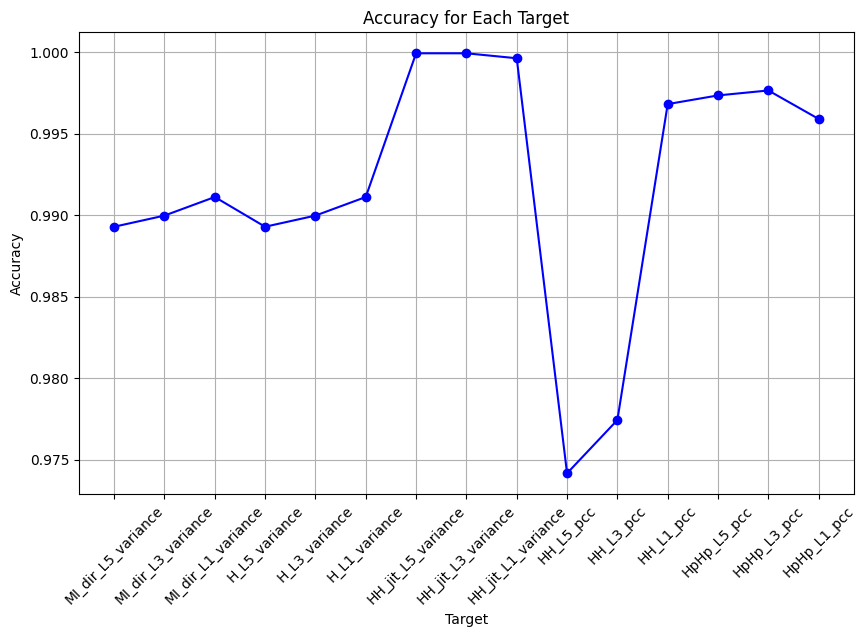

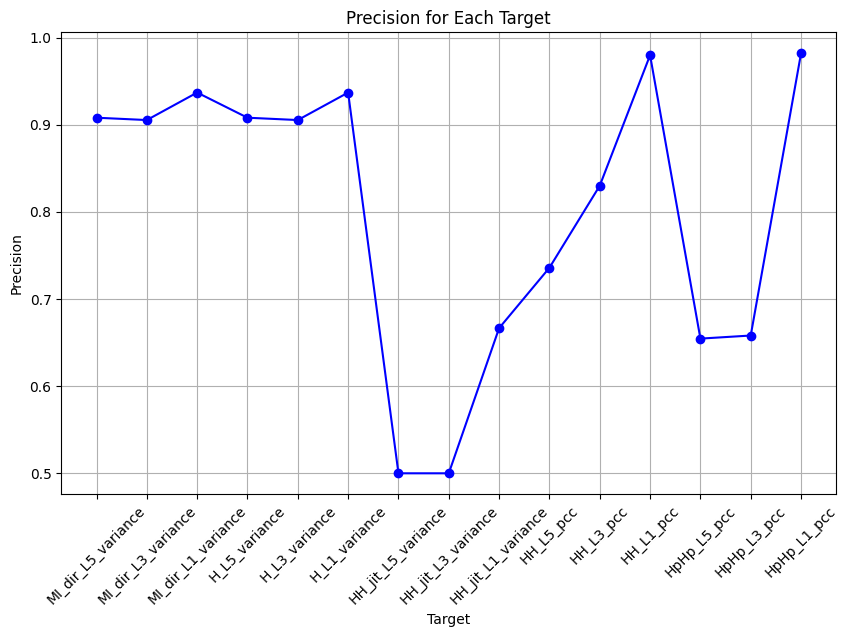

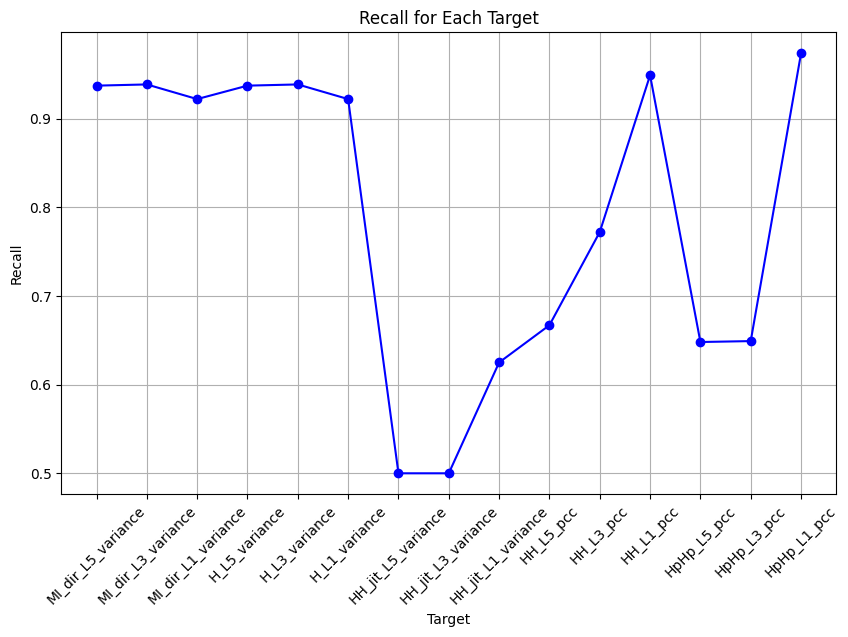

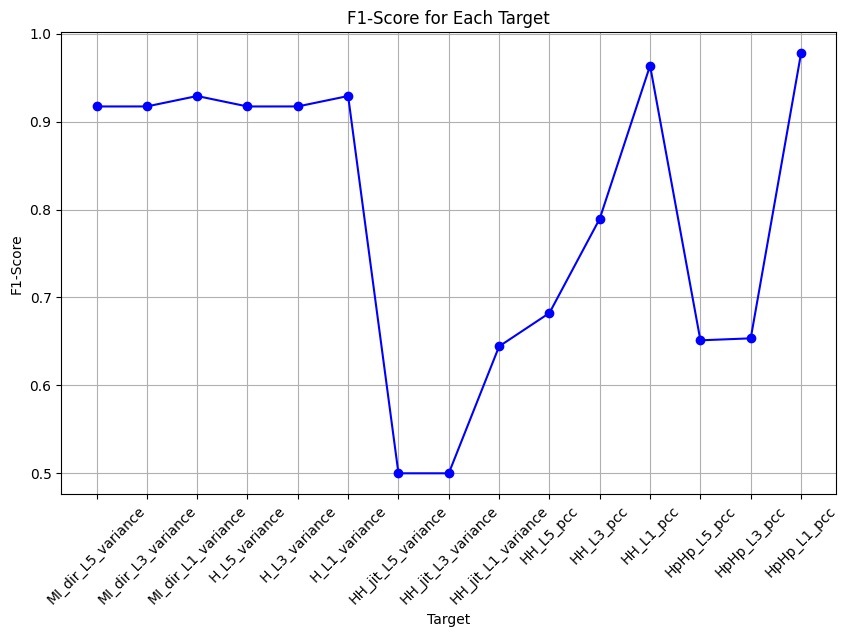

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    rf_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = rf_model.predict(X_valid)

    # Predict on the test set
    y_test_pred = rf_model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

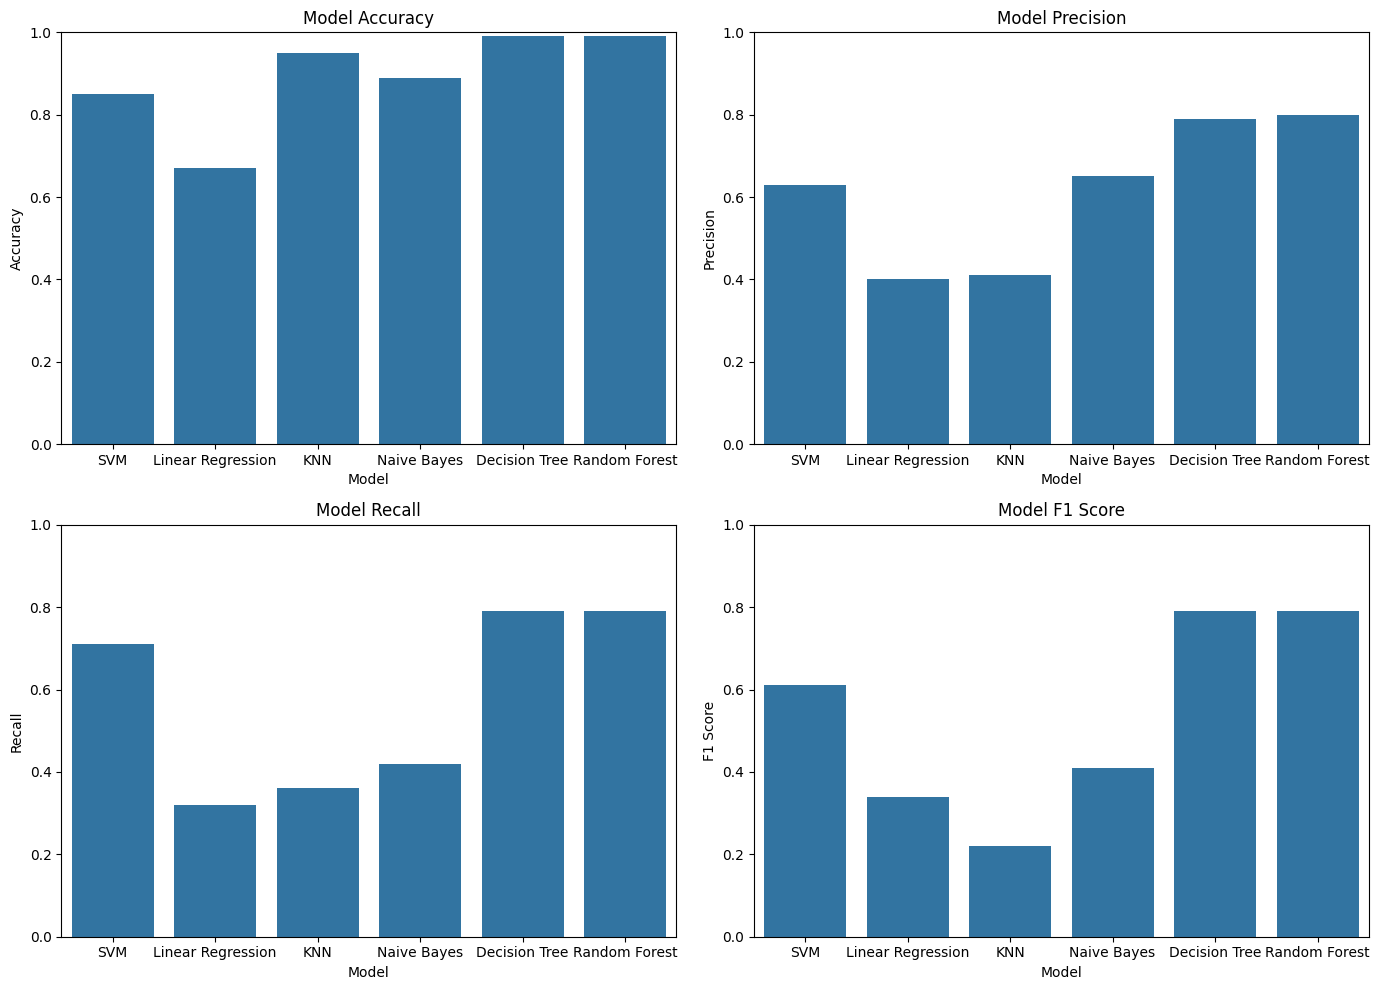

In [ ]:
data = {
    'Model': ['SVM', 'Linear Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.85, 0.67, 0.95, 0.89, 0.99, 0.99],
    'Precision': [0.63, 0.40, 0.41,0.65 ,0.79, 0.80],
    'Recall': [0.71, 0.32, 0.36, 0.42, 0.79, 0.79],
    'F1 Score': [0.61, 0.34, 0.22, 0.41, 0.79, 0.79]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df)
plt.title('Model Accuracy')
plt.ylim(0, 1)

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=df)
plt.title('Model Precision')
plt.ylim(0, 1)

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=df)
plt.title('Model Recall')
plt.ylim(0, 1)

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=df)
plt.title('Model F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()